In [3]:
#pip install tensorflow==2.17.1


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/382.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/382.4 MB 19.2 MB/s eta 0:00:20
   ---------------------------------------- 0.7/382.4 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 1.2/382.4 MB 9.3 MB/s eta 0:00:42
   ---------------------------------------- 1.6/382.4 MB 9.1 MB/s eta 0:00:42
   ---------------------------------------- 2.0/382.4 MB 9.2 MB/s eta 0:00:42
   ---------------------------------------- 2.4/382.4 MB 8.9 MB/s eta 0:00:43
   ---------------------------------------- 2.8/382.4 MB 8.9 MB/s eta 0:00:43
   ---------------------------------------- 3.2/382.4 MB 8.6 MB/s eta 0:00:44
   ---------------------------------------- 3.7/382.4 MB 9.0 MB/s eta 0:00:43
   ---------------------------------------- 4.1/382.4 MB 9.0 MB/s eta 0:00

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [7]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
# Good No Null Values!
df.isnull().sum().max()

0

In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


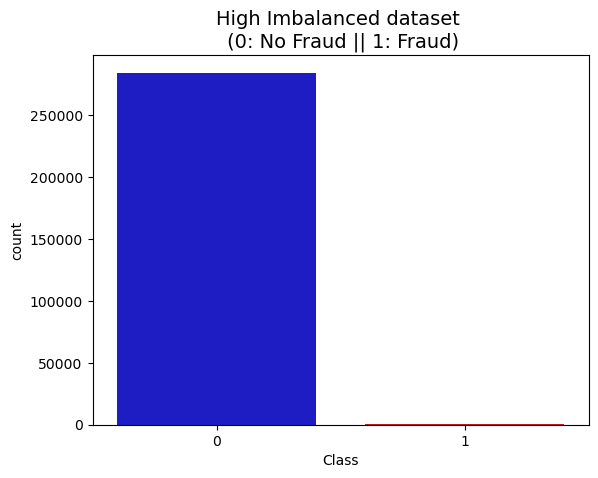

In [19]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x = 'Class', data=df, palette=colors)
plt.title('High Imbalanced dataset \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.savefig('imbalanced_dataset2.eps', format='eps')

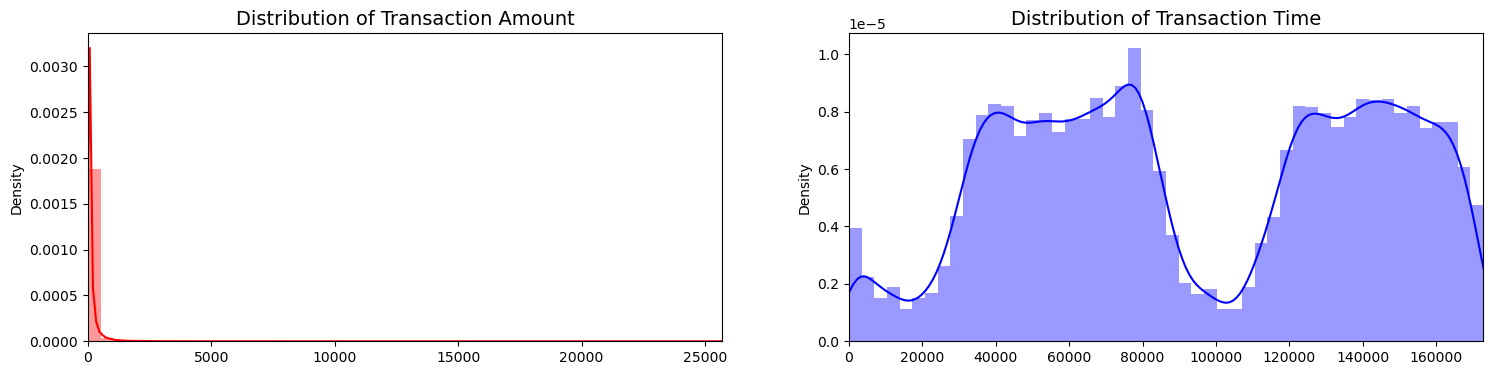

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

In [23]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [25]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [29]:
# Turn into an array
original_Xtrain = original_Xtrain
original_Xtest = original_Xtest
original_ytrain = original_ytrain
original_ytest = original_ytest

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [31]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
30512,0.521903,-0.572504,0.080948,-0.414083,0.787683,-0.650663,-0.828400,0.949776,-2.476987,-2.228025,...,0.776119,-1.212650,0.712835,-1.037621,-0.735338,0.609706,0.526434,0.186238,0.261997,0
203328,12.622232,0.588318,-0.967767,2.098019,-5.222929,6.514573,-4.187674,2.114178,0.948701,-2.448427,...,1.147204,-0.843268,0.796739,1.314312,-0.352887,-1.770706,0.098133,0.956769,0.162777,1
275696,-0.167819,0.963216,2.046390,-0.022741,-1.054782,0.418061,-0.090713,-1.198637,0.245703,-0.379529,...,-0.160861,-0.275255,-0.641505,0.325262,0.066879,-0.277683,0.192043,-0.067459,-0.056839,0
243547,0.499266,0.790423,-6.618211,3.835943,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,0.613470,...,-0.953827,1.636622,0.038727,0.278218,0.786670,0.063895,0.154707,-2.042403,1.405141,1
79874,-0.236289,-0.311035,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,...,-0.067205,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,1


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


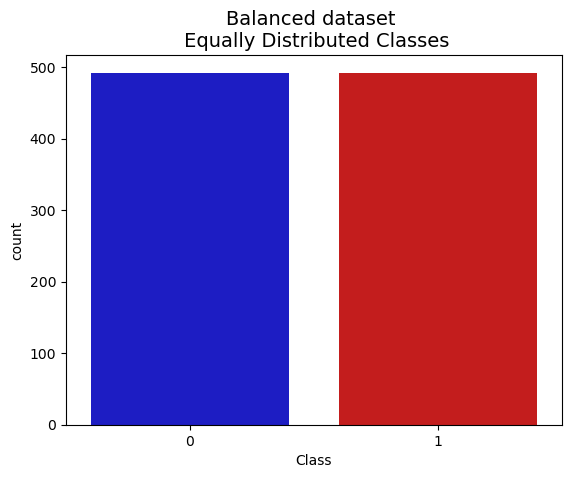

In [33]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot(x = 'Class', data=new_df, palette=colors)
plt.title('Balanced dataset \n Equally Distributed Classes', fontsize=14)
plt.savefig('Balanced_dataset2.eps', format='eps')
plt.show()

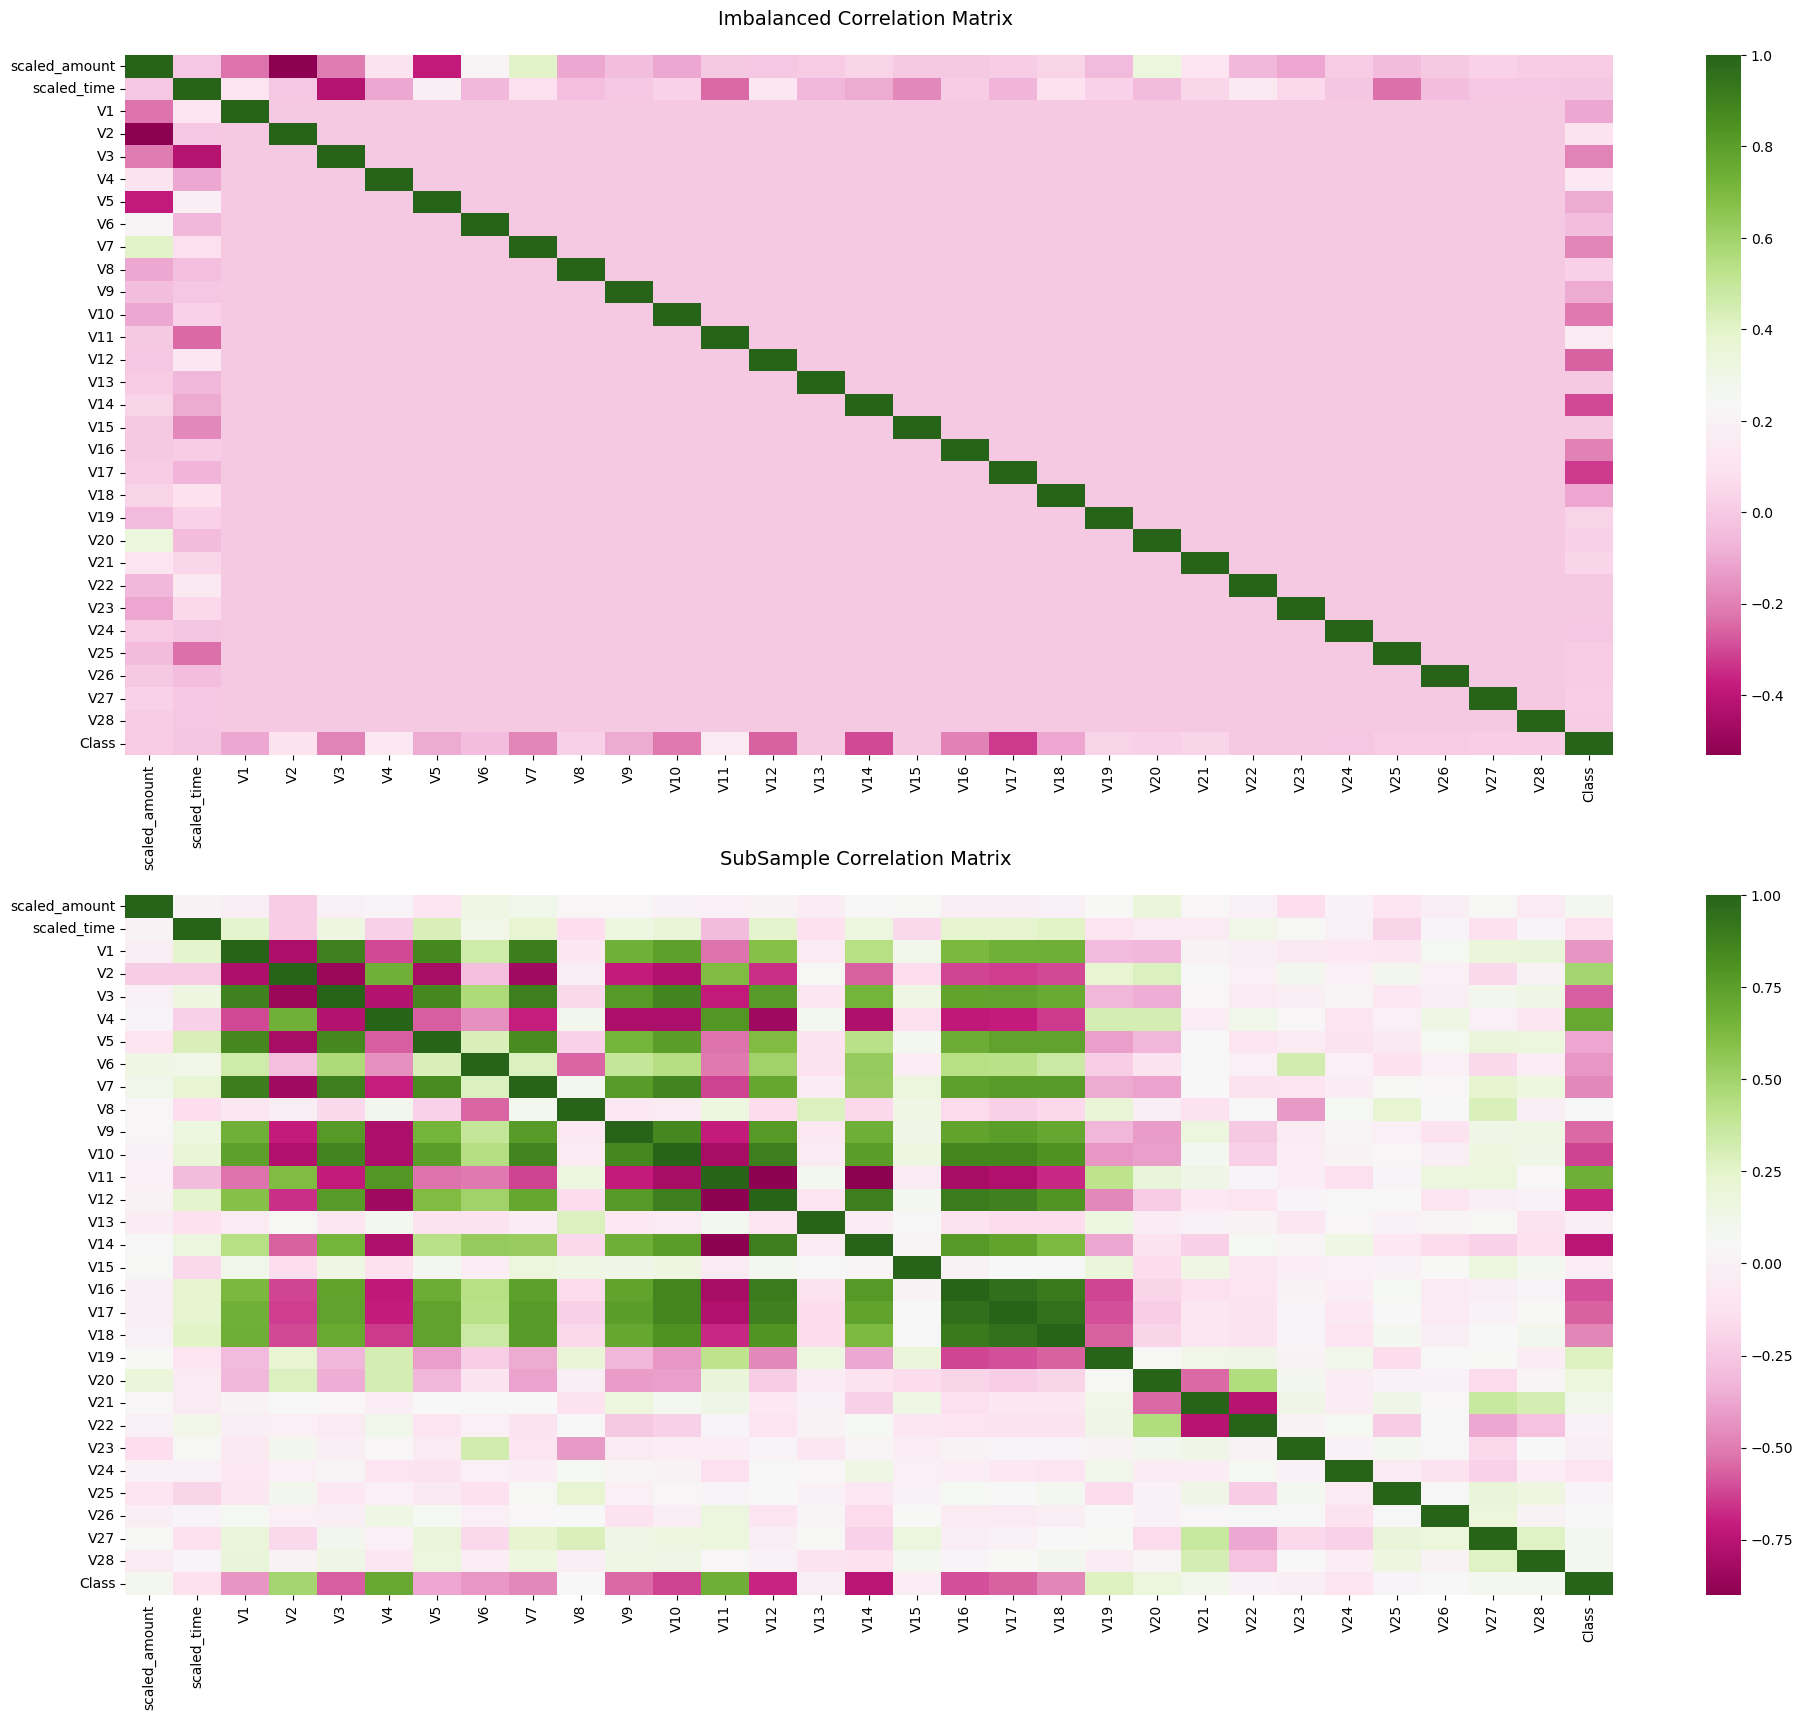

In [35]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='PiYG', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n", fontsize=14)
#plt.savefig('imb_cor1.eps', format='eps')

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='PiYG', annot_kws={'size':20}, ax=ax2) #coolwarm_r
ax2.set_title('SubSample Correlation Matrix \n', fontsize=14)
plt.savefig('Bal_cor2.eps', format='eps')
plt.show()

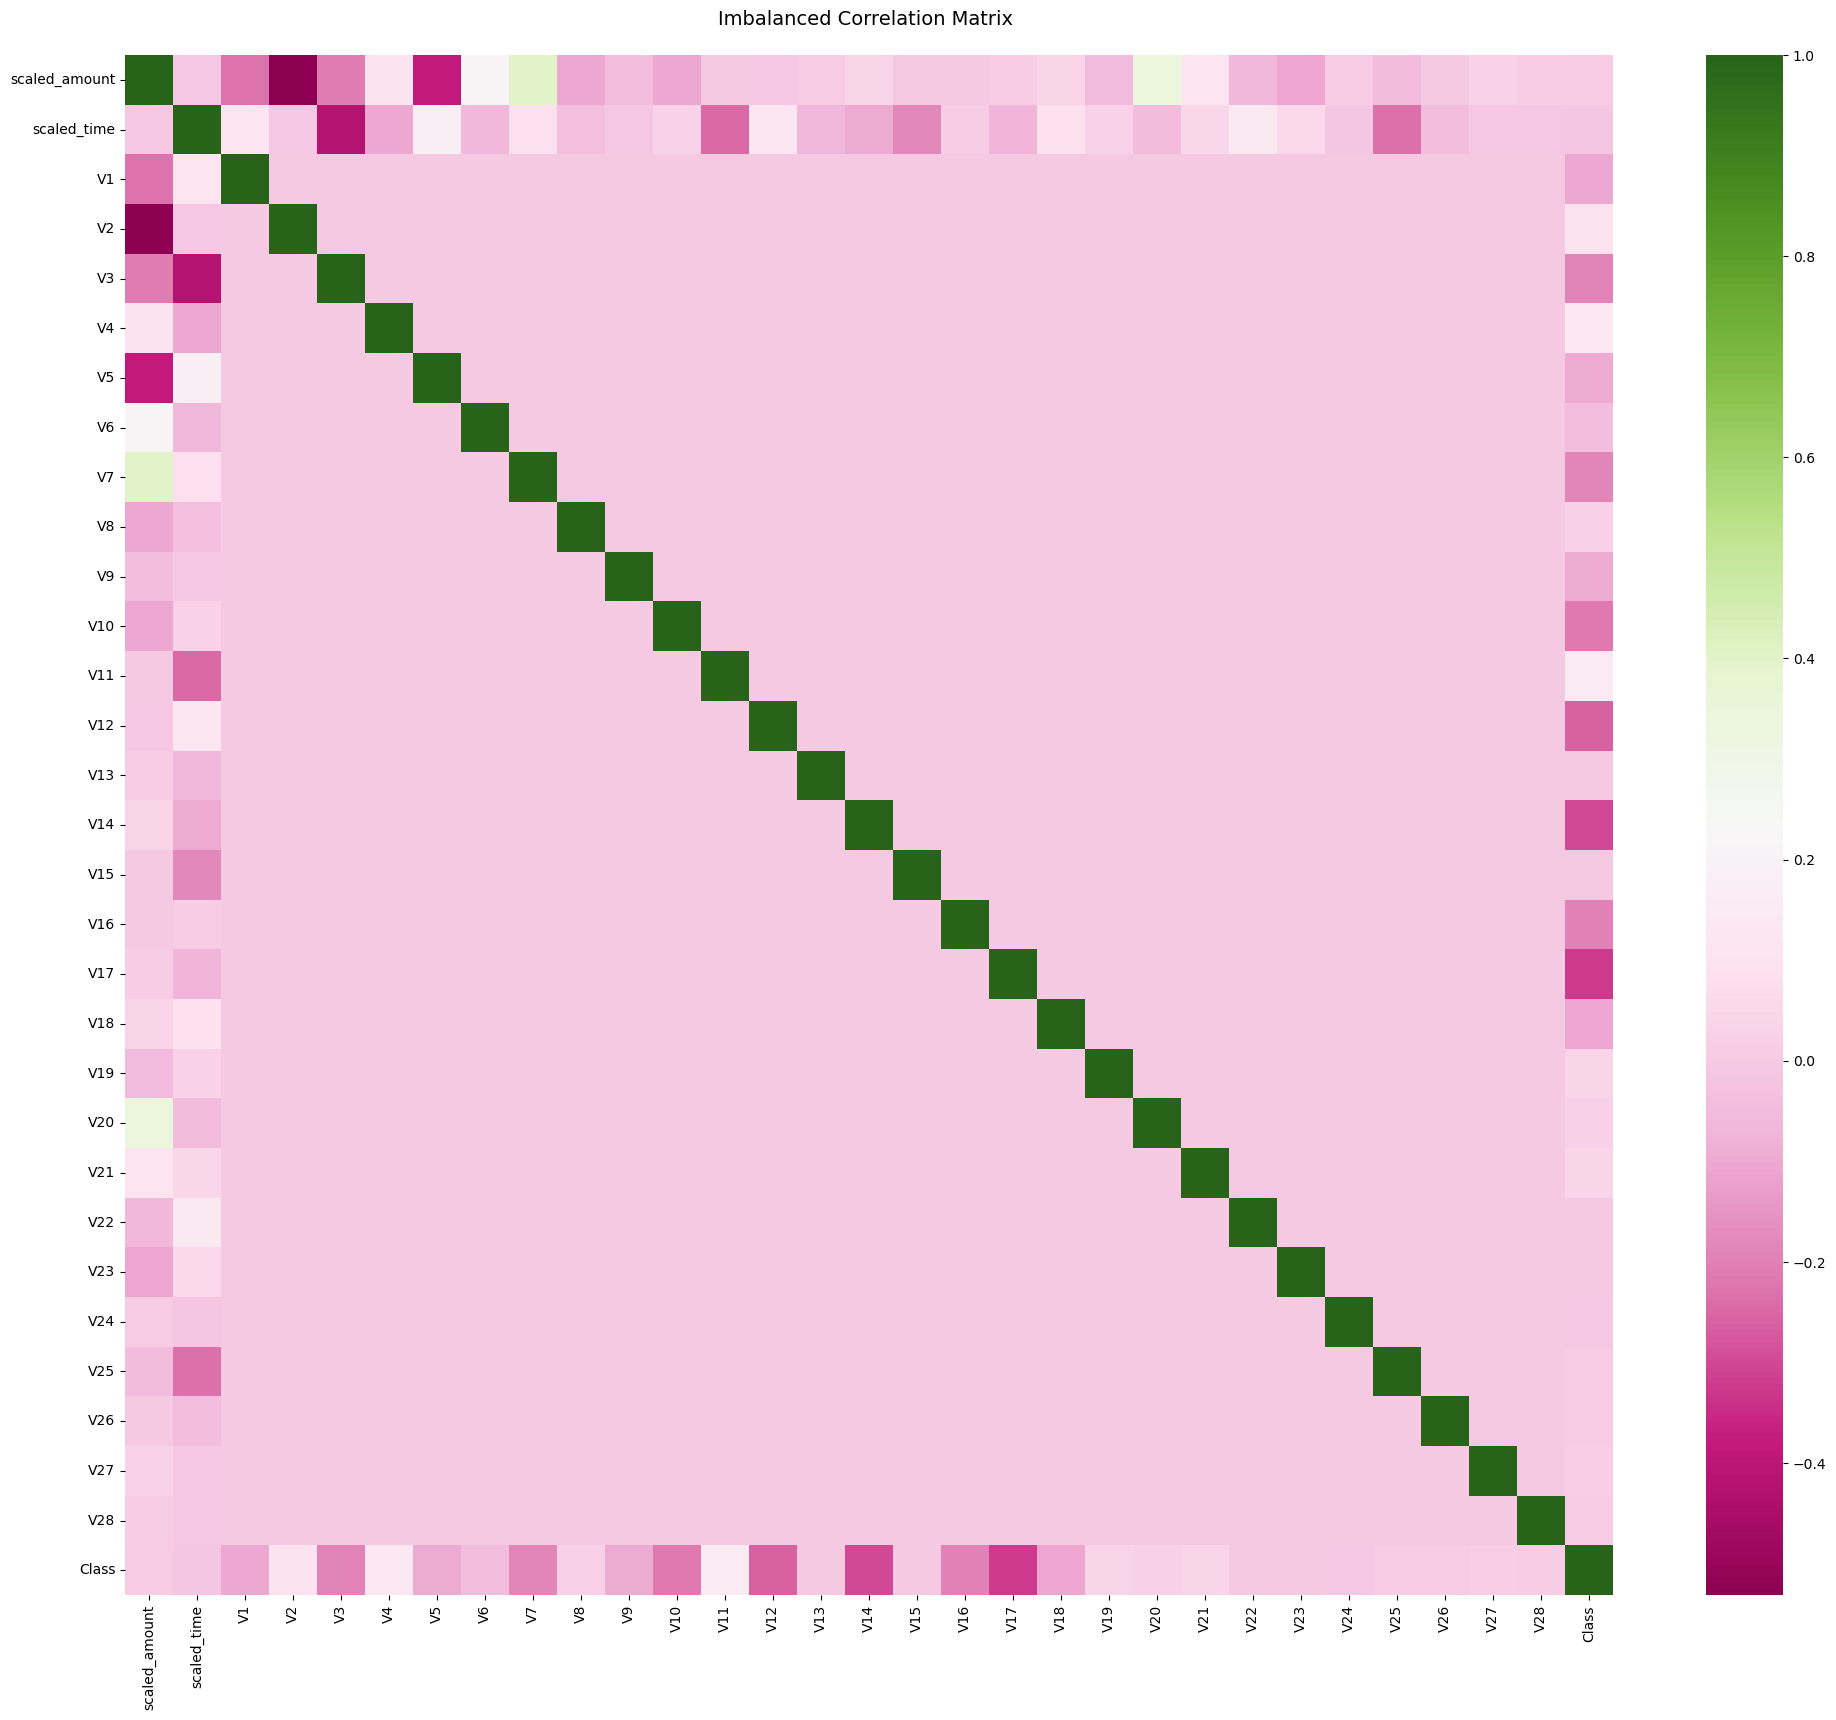

In [37]:
f, ax1 = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='PiYG', annot_kws={'size':20}, ax = ax1)
ax1.set_title("Imbalanced Correlation Matrix \n", fontsize=14)
plt.savefig('imb_cor1.eps', format='eps')


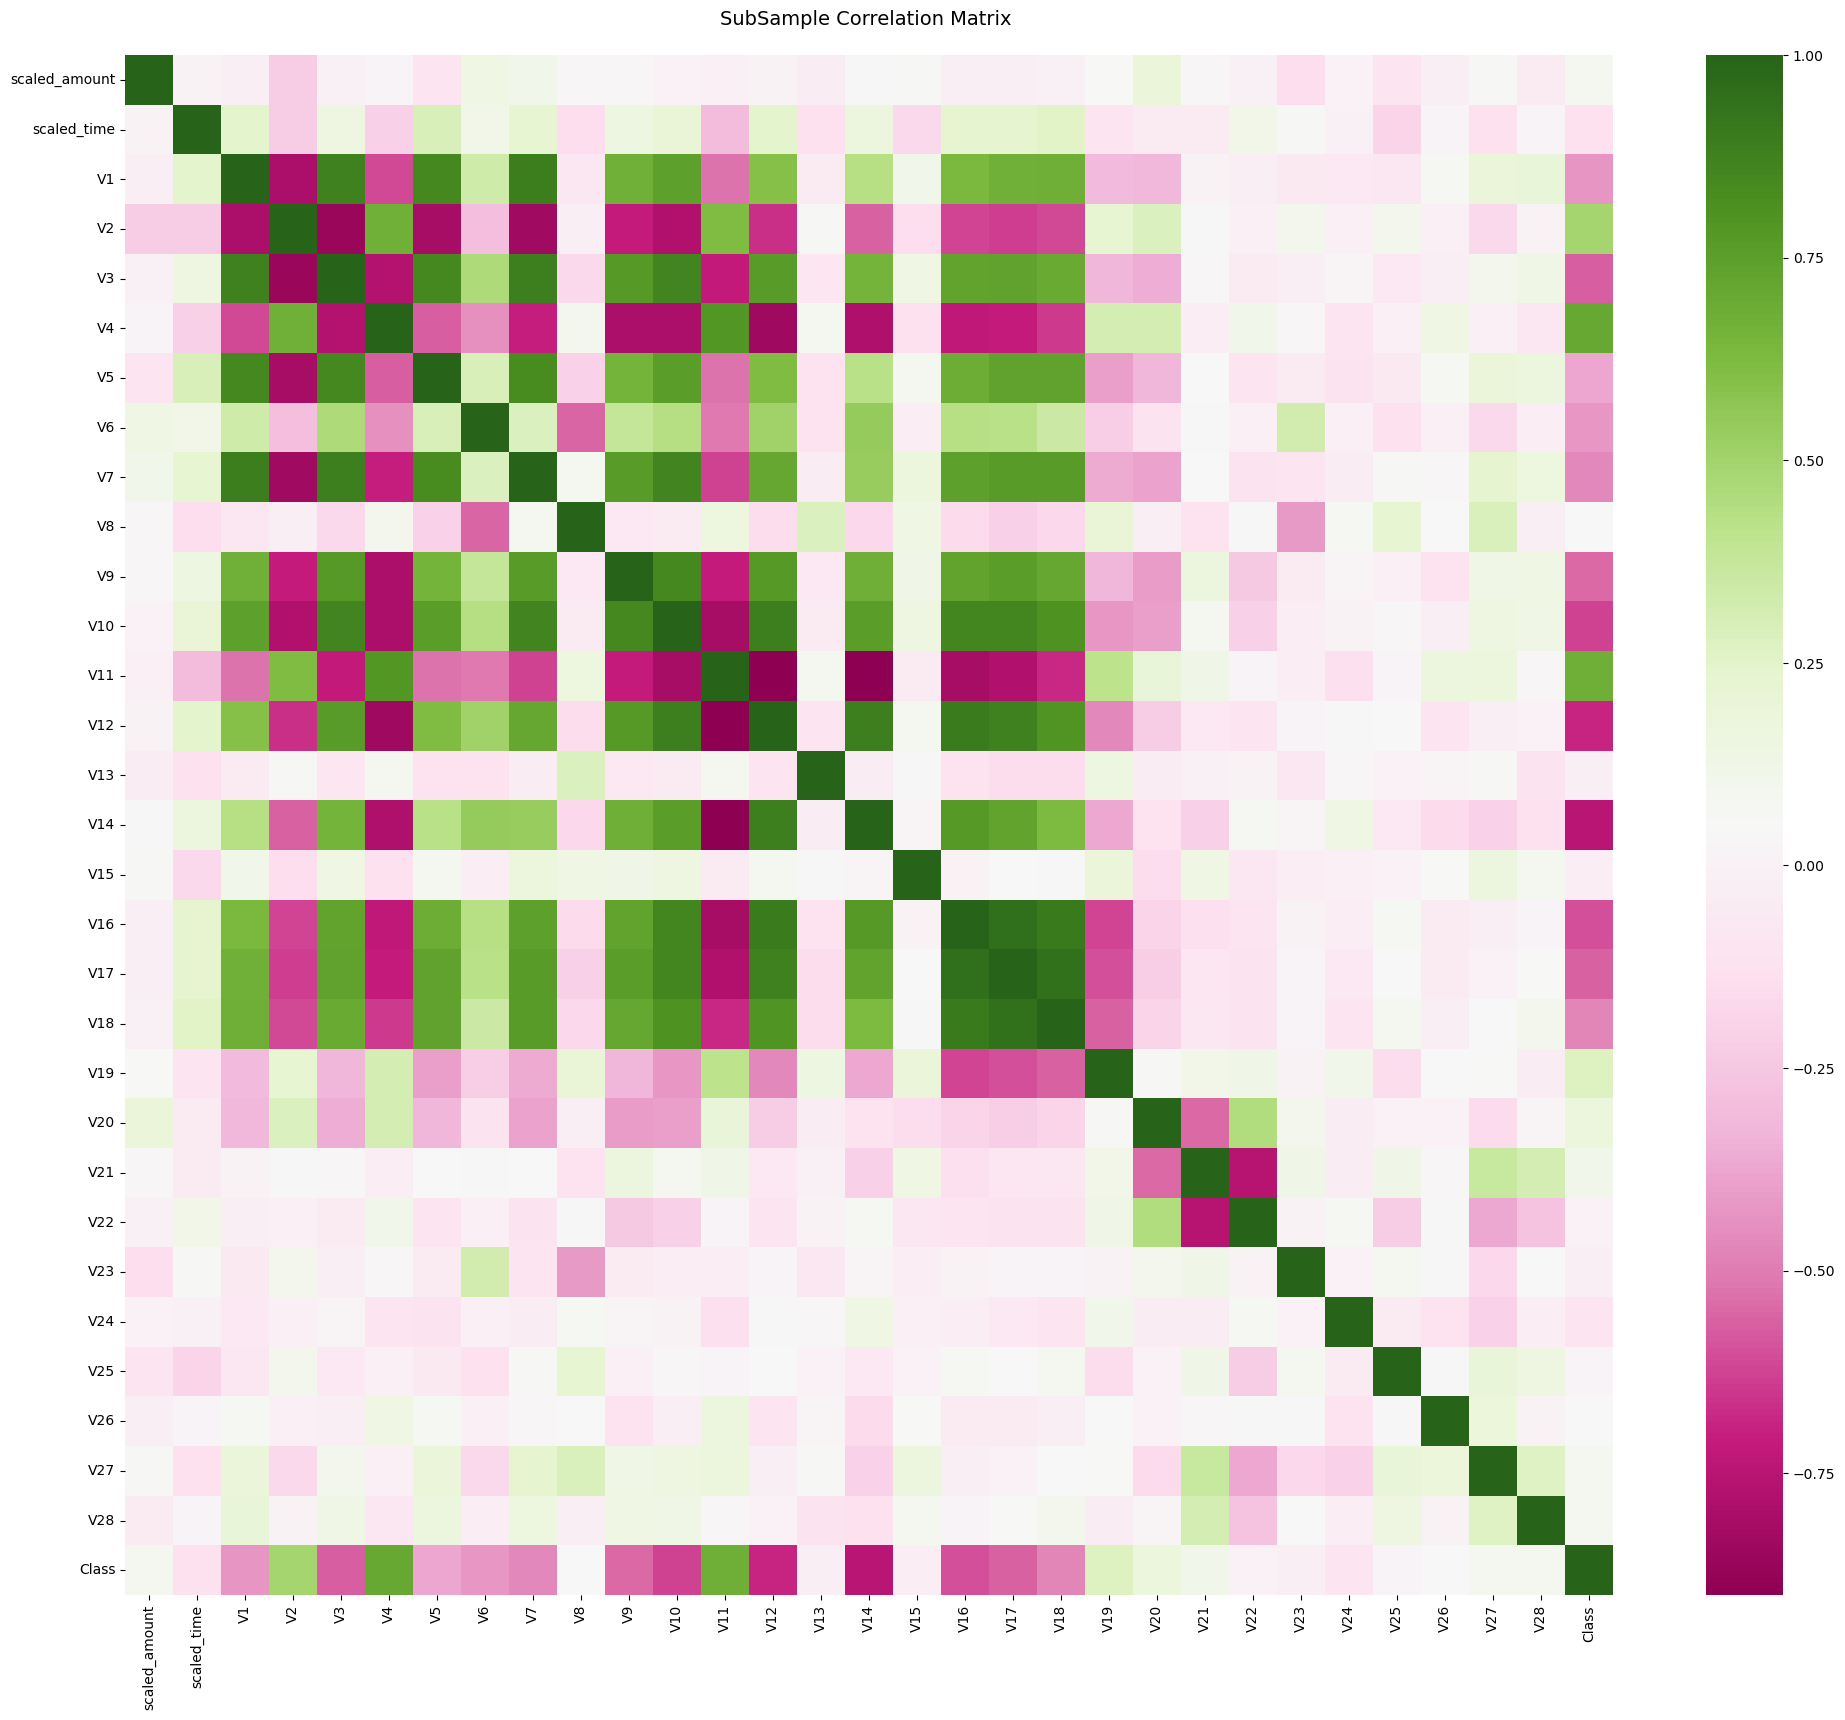

In [39]:

f, ax2 = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
#corr = df.corr()
#sns.heatmap(corr, cmap='PiYG', annot_kws={'size':20}, ax=ax1)
#ax1.set_title("Imbalanced Correlation Matrix \n", fontsize=14)
#plt.savefig('imb_cor1.eps', format='eps')

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='PiYG', annot_kws={'size':20}, ax=ax2) #coolwarm_r
ax2.set_title('SubSample Correlation Matrix \n', fontsize=14)
plt.savefig('Bal_cor2.eps', format='eps')
plt.show()

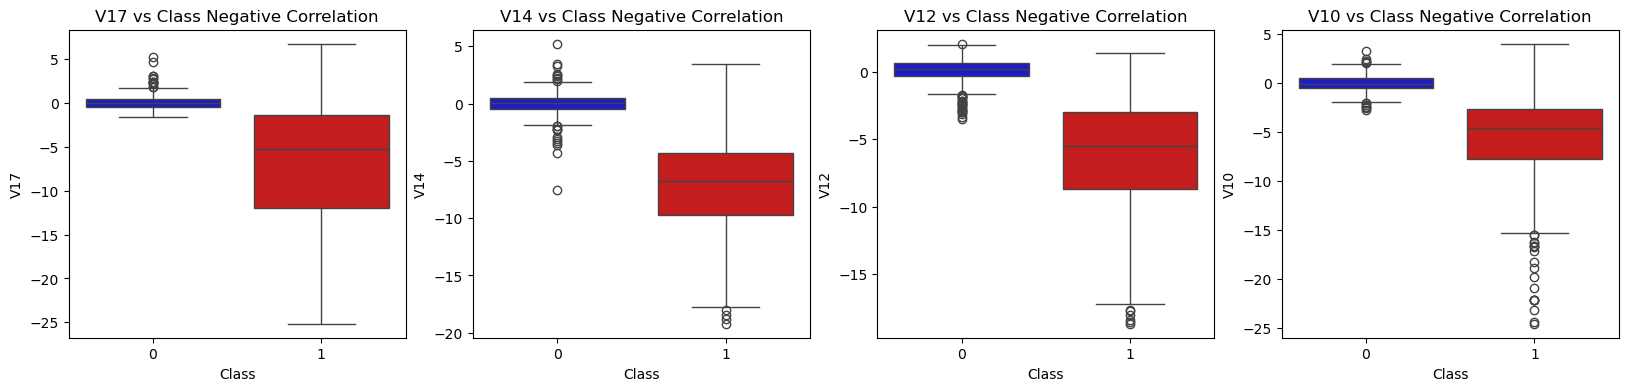

In [41]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

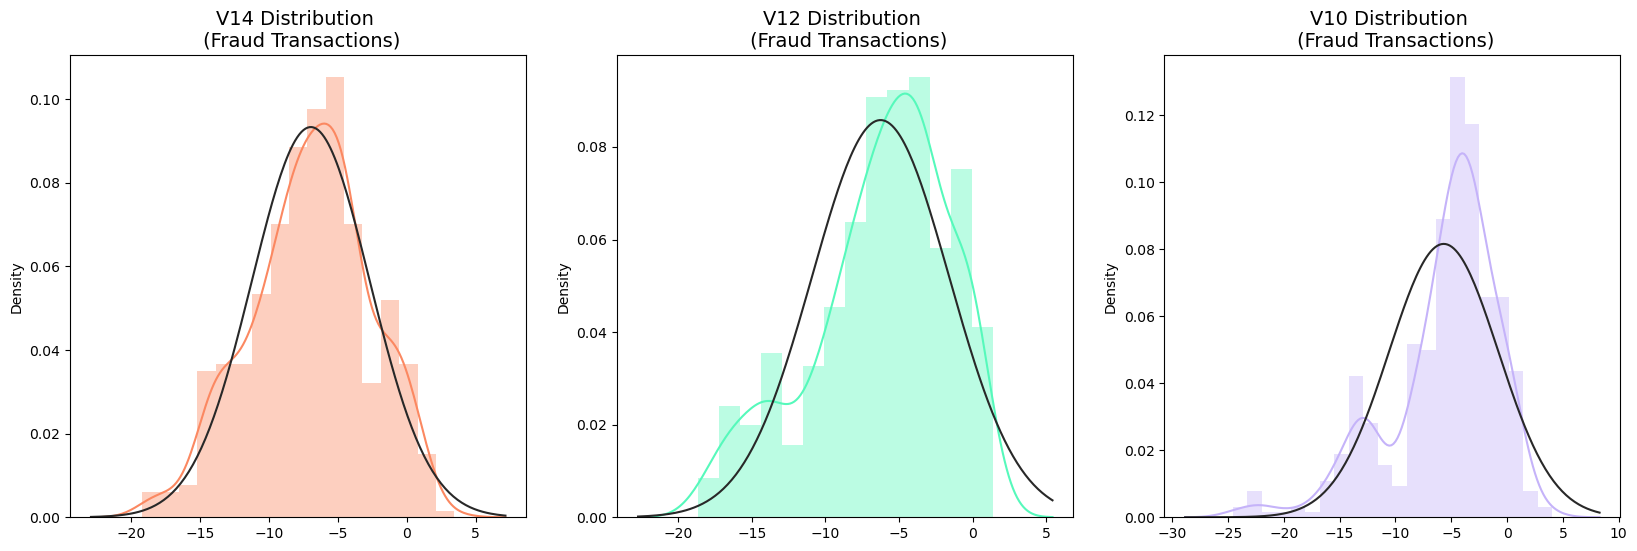

In [43]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [45]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))


Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.4937733551053, -18.0499976898594, -19.2143254902614, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.4311310279993, -18.0475965708216, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-17.1415136412892, -15.563791

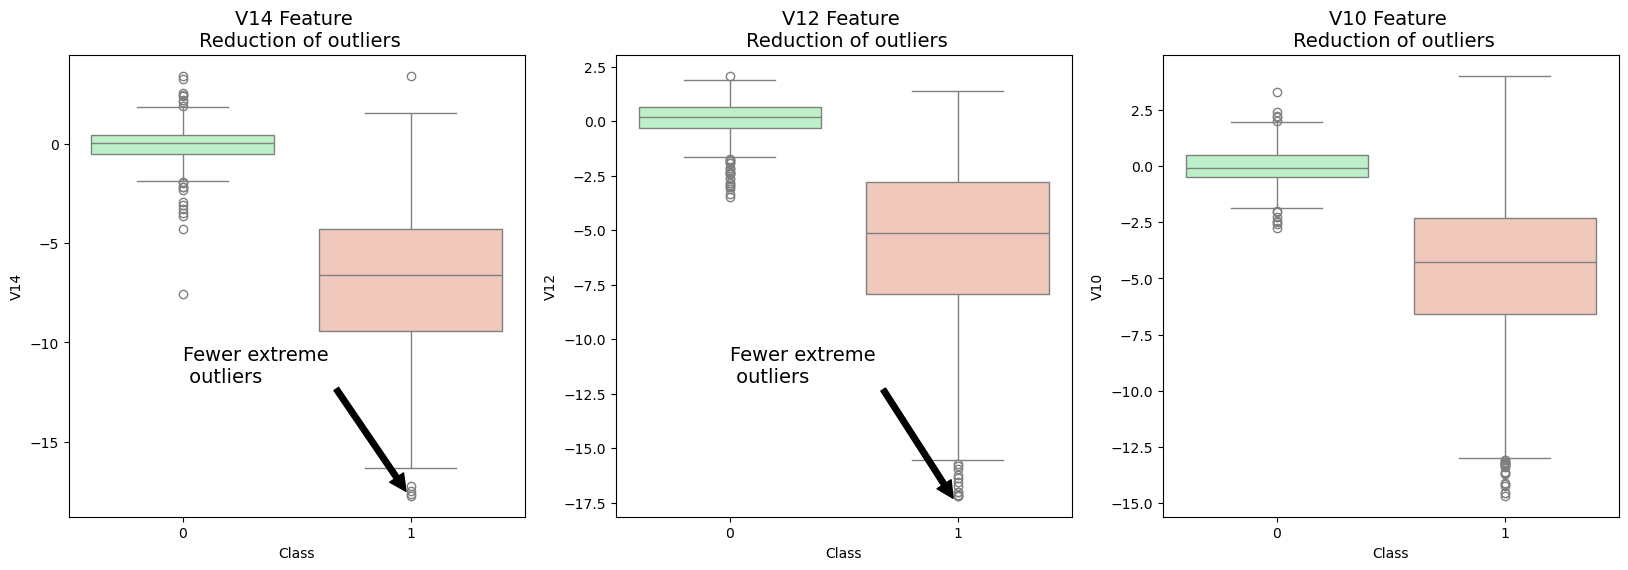

In [47]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()


In [49]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 9.9 s
PCA took 0.011 s
Truncated SVD took 0.01 s


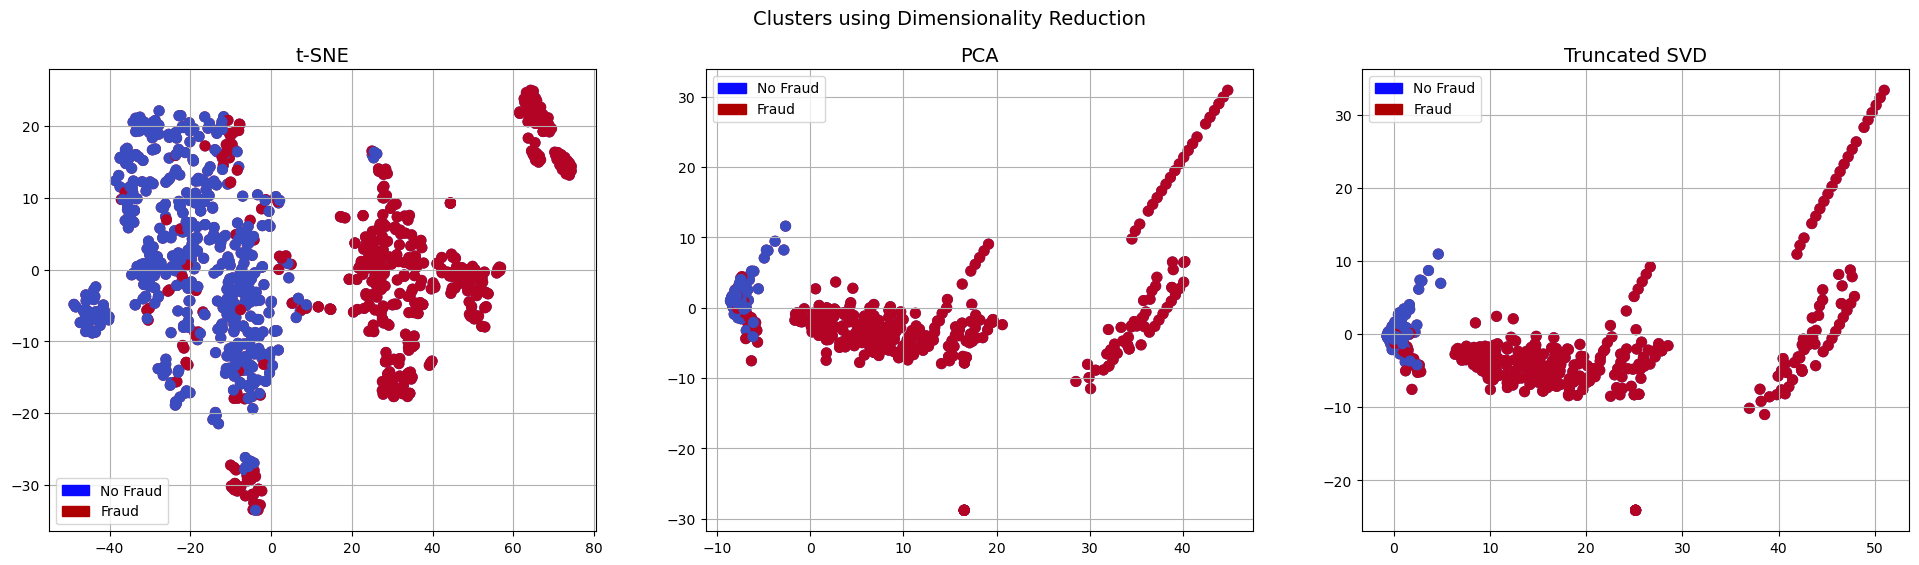

In [50]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()


In [53]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']
y = 2*y - 1

In [55]:
print(y)

30512    -1
203328    1
275696   -1
243547    1
79874     1
         ..
199758   -1
204064    1
258926   -1
8845      1
154670    1
Name: Class, Length: 948, dtype: int64


In [125]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [127]:
def hinge_loss(X, y, w, b):
    # Hinge loss function
    return np.maximum(0, 1 - y * (np.dot(X, w) + b))

def l1_regularization(w, lam):
    # L1 regularization penalty
    return lam * np.linalg.norm(w, ord=1)

def additional_convex_function(w):
    # Additional convex function (can be chosen based on problem requirements)
    # For example, the L2 norm of the weight vector
    return 0.5 * np.linalg.norm(w)**2

def proximal_l1(w, alpha, lam):
    # Proximal operator for L1 regularization (soft thresholding)
    return np.sign(w) * np.maximum(0, np.abs(w) - alpha * lam)

def dc_programming_l1svm(X, y, w_init, b_init, C, lam, lr, max_iter, tol):
    # DC programming algorithm for L1-SVM
    
    # Initialize weights and bias
    w = w_init
    b = b_init
    
    # Initialize iteration count
    iter_count = 0
    
    start_time = time.time()
    # Perform optimization
    for i in range(max_iter):
        # Compute hinge loss
        loss = hinge_loss(X, y, w, b)
        
        # Compute gradients
        grad_w = -np.dot(X.T, y * (loss > 0))
        grad_b = -np.sum(y * (loss > 0))
        
        # Update weights using proximal operator for L1 regularization
        w_new = proximal_l1(w - lr * grad_w, lr * C, lam)
        
        # Update bias
        b_new = b - lr * grad_b
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            break
        
        # Update weights and bias for next iteration
        w = w_new
        b = b_new
        
        end_time = time.time()
        time_taken = end_time - start_time
        # Increment iteration count
        iter_count += 1
    
    return w, b, iter_count, time_taken

# Example usage
# X: feature matrix, y: labels (-1 for negative class, +1 for positive class)
# w_init: initial weight vector, b_init: initial bias, C: regularization parameter for SVM
# lam: regularization parameter for L1 penalty, lr: learning rate, max_iter: maximum iterations
# tol: convergence tolerance

In [129]:
def hinge_loss(X, y, w, b):
    # Hinge loss function
    return np.maximum(0, 1 - y * (np.dot(X, w) + b))

def proximal_f(x,lam):
    # Proximal operator for f(x) = 0.5 * ||x||^2
    return x / (1 + lam)  # where alpha is the step size

def proximal_g(x, lam):
    # Proximal operator for L1 regularization g(x)
    return np.sign(x) * np.maximum(np.abs(x) - lam, 0)

def grad_h(X, y, w, b):
    # Gradient of the hinge loss function
    loss = hinge_loss(X, y, w, b)
    grad_w = -np.dot(X.T, y * (loss > 0))
    grad_b = -np.sum(y * (loss > 0))
    return grad_w, grad_b

def dc_programming_Alg1(X, y, w_init, b_init, C, lam, lr, max_iter, tol):
    # DC programming algorithm for L1-SVM
    
    # Initialize weights and bias
    w = w_init
    v = w_init  # Initialize v with the same value as w
    
    # Initialize iteration count
    iter_count = 0
    
    # Define constants
    tht = 0.001
    kap = 0.3
    
    start_time = time.time()
    # Perform optimization
    for i in range(max_iter):
        # Compute hinge loss
        loss = hinge_loss(X, y, w, b_init)
        
        grad_h_w, grad_h_b = grad_h(X, y, w, b_init)
        
       # Update u and y
        un = 1 / (1 + tht) * w + tht / (1 + tht) * v
        yn = proximal_f(un,lam)
        
        # Update z and w_new
        zn = proximal_g(2 * yn - un - C * grad_h_w, lam)
        w_new = zn + kap * (zn - yn)
        
        # Update v_new
        v_new = 1 / (tht + 1) * w_new + tht / (1 + tht) * v
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            break
        
        # Update weights and v for next iteration
        w = w_new
        v = v_new
        
        end_time = time.time()
        time_taken = end_time - start_time
        # Increment iteration count
        iter_count += 1
    
    return w, b_init, iter_count, time_taken

# Example usage
# X: feature matrix, y: labels (-1 for negative class, +1 for positive class)
# w_init: initial weight vector, b_init: initial bias, C: regularization parameter for SVM
# lam: regularization parameter for L1 penalty, lr: learning rate, max_iter: maximum iterations
# tol: convergence tolerance

In [196]:
def dc_programming_Alg2(X, y, w_init, b_init, C, lam, lr, max_iter, tol):
    # DC programming algorithm for L1-SVM
    
    # Initialize weights and bias
    w = w_init
    v = w_init  # Initialize v with the same value as w
    
    # Initialize iteration count
    iter_count = 0
    
    # Define constants
    
    kap = 0.1
    
    start_time = time.time()
    # Perform optimization
    for i in range(max_iter):
        # Compute hinge loss
        alpha = 1/(500*i+500)
        loss = hinge_loss(X, y, w, b_init)
        
        grad_h_w, grad_h_b = grad_h(X, y, w, b_init)
        
       # Update u and y
        un = (1-alpha) * w + alpha * v
        yn = proximal_f(un,lam)
        
        # Update z and w_new
        zn = proximal_g(2 * yn - un - C * grad_h_w, lam)
        w_new = zn + kap * (zn - yn)
        
        # Update v_new
        v_new = (1-alpha) * w_new + alpha * v
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            break
        
        # Update weights and v for next iteration
        w = w_new
        v = v_new
        
        end_time = time.time()
        time_taken = end_time - start_time
        # Increment iteration count
        iter_count += 1
    
    return w, b_init, iter_count, time_taken

In [198]:
def dc_programming_DCA(X, y, w_init, b_init, C, lam, lr, max_iter, tol):
    # DC programming algorithm for L1-SVM
    
    # Initialize weights and bias
    w = w_init
    v = w_init  # Initialize v with the same value as w
    
    # Initialize iteration count
    iter_count = 0
    
    # Define constants
    tht = 0.1
    kap = 0.01
    alpha = 0.0003
    
    start_time = time.time()
    # Perform optimization
    for i in range(max_iter):
        # Compute hinge loss
        loss = hinge_loss(X, y, w, b_init)
        
        grad_h_w, grad_h_b = grad_h(X, y, w, b_init)
        
       # Update u and y
       # un = (1-alpha) * w + alpha * v
        yn = proximal_f(w,lam)
        
        # Update z and w_new
        zn = proximal_g(2 * yn - w - C * grad_h_w, lam)
        w_new = zn + kap * (zn - yn)
        
        # Update v_new
       # v_new = (1-alpha) * w_new + alpha * v
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            break
        
        # Update weights and v for next iteration
        w = w_new
        #v = v_new
        
        end_time = time.time()
        time_taken = end_time - start_time
        # Increment iteration count
        iter_count += 1
    
    return w, b_init, iter_count, time_taken

In [200]:
def dc_programming_GDCP(X, y, w_init, b_init, C, lam, lr, max_iter, tol):
    # DC programming algorithm for L1-SVM
    
    # Initialize weights and bias
    w = w_init
    ix = w_init  # Initialize v with the same value as w
    
    # Initialize iteration count
    iter_count = 0
    
    # Define constants
    tht = 0.1
    kap = 0.05
    alpha = 0.0001
    
    start_time = time.time()
    # Perform optimization
    for i in range(max_iter):
        # Compute hinge loss
        loss = hinge_loss(X, y, w, b_init)
        
        grad_h_w, grad_h_b = grad_h(X, y, w, b_init)
        
       # Update u and y
        un = w  + alpha * (w - ix)
        yn = proximal_f(w,lam)
        
        # Update z and w_new
        zn = proximal_g(2 * yn - un - C * grad_h_w, lam)
        w_new = zn + kap * (zn - yn)
        
        # Update v_new
       # v_new = (1-alpha) * w_new + alpha * v
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            break
        
        # Update weights and v for next iteration
        ix = w
        w = w_new
        
        
        end_time = time.time()
        time_taken = end_time - start_time
        # Increment iteration count
        iter_count += 1
    
    return w, b_init, iter_count, time_taken

In [202]:
def dc_programming_DYSA(X, y, w_init, b_init, C, lam, lr, max_iter, tol):
    # DC programming algorithm for L1-SVM
    
    # Initialize weights and bias
    w = w_init
    ix = w_init  # Initialize v with the same value as w
    
    # Initialize iteration count
    iter_count = 0
    
    # Define constants
    tht = 0.1
    kap = 0.05
    alpha = 0.0001
    
    start_time = time.time()
    # Perform optimization
    for i in range(max_iter):
        # Compute hinge loss
        loss = hinge_loss(X, y, w, b_init)
        
        grad_h_w, grad_h_b = grad_h(X, y, w, b_init)
        
       # Update u and y
        yn = proximal_f(w,lam)
        
        # Update z and w_new
        zn = proximal_g(2 * yn - w - C * grad_h_w, lam)
        w_new = zn + kap * (zn - yn)
        
        # Update v_new
       # v_new = (1-alpha) * w_new + alpha * v
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            break
        
        # Update weights and v for next iteration
        ix = w
        w = w_new
        
        
        end_time = time.time()
        time_taken = end_time - start_time
        # Increment iteration count
        iter_count += 1
    
    return w, b_init, iter_count, time_taken

In [204]:
def dc_programming_pDCAe(X, y, w_init, b_init, C, lam, lr, max_iter, tol):
    # DC programming algorithm for L1-SVM
    
    # Initialize weights and bias
    w = w_init
    ix = w_init  # Initialize v with the same value as w
    
    # Initialize iteration count
    iter_count = 0
    
    # Define constants
    tht = 0.1
    kap = 0.05
    alpha = 0.0001
    
    start_time = time.time()
    # Perform optimization
    for i in range(max_iter):
        # Compute hinge loss
        loss = hinge_loss(X, y, w, b_init)
        
        grad_h_w, grad_h_b = grad_h(X, y, w, b_init)
        
       # Update u and y
        un = w  + alpha * (w - ix)
        yn = proximal_f(w,lam)
        
        # Update z and w_new
        w_new = proximal_g(2 * yn - un - C * grad_h_w, lam)
       # w_new = zn + kap * (zn - yn)
        
        # Update v_new
       # v_new = (1-alpha) * w_new + alpha * v
        
        # Check convergence
        if np.linalg.norm(w_new - w) < tol:
            break
        
        # Update weights and v for next iteration
        ix = w
        w = w_new
        
        
        end_time = time.time()
        time_taken = end_time - start_time
        # Increment iteration count
        iter_count += 1
    
    return w, b_init, iter_count, time_taken

In [206]:
# Assuming X, y are already loaded
# Initialize parameters
w_init = np.zeros(X.shape[1])
b_init = 0

In [208]:
# Due to the algorithm converging to zeros, we want to try different techniques to resolve this.
# 1. Initialize the starting weight and bias to non-zero vectors as follows:

# Define the dimensions of the weight vector
num_features = X.shape[1]

# Initialize weights with small random values
w_init = np.random.randn(num_features) * 0.01

# Initialize bias with a small random value
b_init = np.random.randn() * 0.002

In [210]:
C = 1  # regularization parameter for SVM
lam = 0.01  # regularization parameter for L1 penalty
lr = 0.03  # learning rate
max_iter = 2000
tol = 1e-4

In [212]:
# Run DC programming algorithm for L1-SVM
w_final_GD, b_final_GD, iter_count_GD, time_taken_GD = dc_programming_l1svm(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_Alg1, b_final_Alg1, iter_count_Alg1, time_taken_Alg1 = dc_programming_Alg1(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_Alg2, b_final_Alg2, iter_count_Alg2, time_taken_Alg2 = dc_programming_Alg2(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_DCA, b_final_DCA, iter_count_DCA, time_taken_DCA = dc_programming_DCA(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_GDCP, b_final_GDCP, iter_count_GDCP, time_taken_GDCP = dc_programming_GDCP(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_DYSA, b_final_DYSA, iter_count_DYSA, time_taken_DYSA = dc_programming_DYSA(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_pDCAe, b_final_pDCAe, iter_count_pDCAe, time_taken_pDCAe = dc_programming_pDCAe(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)

In [213]:
print("Optimal weight vector for GD:", w_final_GD)
print("Optimal bias for GD:", b_final_GD)
print("Number of iterations for GD:", iter_count_GD)

Optimal weight vector for GD: [   9.36998388   -1.17601537   -6.27399639   20.51338472  -27.78909493
   22.56174456  -13.51866816  -12.07945364  -47.54677491    7.34137129
  -21.43729766  -50.99914261   37.17014067  -66.17613337   -0.82727555
  -70.98743472   -1.45961735  -59.59917856 -109.47999093  -42.06997001
   15.25611232   -3.71093531    3.81009799    5.57224083    4.47751423
   -0.31576094    3.07609756   -0.39212859   10.53823712   13.34266887]
Optimal bias for GD: -10.167694040758377
Number of iterations for GD: 2000


In [214]:
print("Time taken for training by GD:", time_taken_GD)
print("Time taken for training by Alg1:", time_taken_Alg1)
print("Time taken for training by Alg2:", time_taken_Alg2)
print("Time taken for training by DCA:", time_taken_DCA)
print("Time taken for training by GDCP:", time_taken_GDCP)
print("Time taken for training by DYSA:", time_taken_DYSA)
print("Time taken for training by pDCAe:", time_taken_pDCAe)

Time taken for training by GD: 5.139599800109863
Time taken for training by Alg1: 5.784287214279175
Time taken for training by Alg2: 5.210812568664551
Time taken for training by DCA: 4.976228475570679
Time taken for training by GDCP: 4.515359163284302
Time taken for training by DYSA: 5.027822732925415
Time taken for training by pDCAe: 5.461297988891602


In [218]:
def predict(X, w, b):
    # Predict labels using the trained model
    y_pred = np.sign(np.dot(X, w) + b)
    return y_pred


# Assuming you have a test set X_test and corresponding true labels y_test
# X_test: feature matrix of the test set, y_test: true labels of the test set

In [220]:
# Make predictions on the test set
y_pred_GD = predict(X_test, w_final_GD, b_final_GD)
y_pred_Alg1 = predict(X_test, w_final_Alg1, b_final_Alg1)
y_pred_Alg2 = predict(X_test, w_final_Alg2, b_final_Alg2)
y_pred_DCA = predict(X_test, w_final_DCA, b_final_DCA)
y_pred_GDCP = predict(X_test, w_final_GDCP, b_final_GDCP)
y_pred_DYSA = predict(X_test, w_final_GDCP, b_final_DYSA)
y_pred_pDCAe = predict(X_test, w_final_GDCP, b_final_pDCAe)

# Calculate accuracy
accuracy_GD = np.mean(y_pred_GD == y_test)
accuracy_Alg1 = np.mean(y_pred_Alg1 == y_test)
accuracy_Alg2 = np.mean(y_pred_Alg2 == y_test)
accuracy_DCA = np.mean(y_pred_DCA == y_test)
accuracy_GDCP = np.mean(y_pred_GDCP == y_test)
accuracy_DYSA = np.mean(y_pred_DYSA == y_test)
accuracy_pDCAe = np.mean(y_pred_pDCAe == y_test)

print("Accuracy for GD:", accuracy_GD)
print("Accuracy for Alg1:", accuracy_Alg1)
print("Accuracy for Alg2:", accuracy_Alg2)
print("Accuracy for DCA:", accuracy_DCA)
print("Accuracy for GDCP:", accuracy_GDCP)
print("Accuracy for DYSA:", accuracy_DYSA)
print("Accuracy for pDCAe:", accuracy_pDCAe)

Accuracy for GD: 0.8842105263157894
Accuracy for Alg1: 0.8421052631578947
Accuracy for Alg2: 0.8631578947368421
Accuracy for DCA: 0.8421052631578947
Accuracy for GDCP: 0.8421052631578947
Accuracy for DYSA: 0.8421052631578947
Accuracy for pDCAe: 0.8421052631578947


In [222]:
from sklearn.metrics import precision_score
# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision_GD = precision_score(y_test, y_pred_GD)
precision_Alg1 = precision_score(y_test, y_pred_Alg1)
precision_Alg2 = precision_score(y_test, y_pred_Alg2)
precision_DCA = precision_score(y_test, y_pred_DCA)
precision_GDCP = precision_score(y_test, y_pred_GDCP)
precision_DYSA = precision_score(y_test, y_pred_DYSA)
precision_pDCAe = precision_score(y_test, y_pred_pDCAe)

print("Precision for GD:", precision_GD)
print("Precision for Alg1:", precision_Alg1)
print("Precision for Alg2:", precision_Alg2)
print("Precision for DCA:", precision_DCA)
print("Precision for GDCP:", precision_GDCP)
print("Precision for DYSA:", precision_DYSA)
print("Precision for pDCAe:", precision_pDCAe)

Precision for GD: 0.8392857142857143
Precision for Alg1: 0.7931034482758621
Precision for Alg2: 0.86
Precision for DCA: 0.8269230769230769
Precision for GDCP: 0.7833333333333333
Precision for DYSA: 0.7833333333333333
Precision for pDCAe: 0.7833333333333333


In [224]:
def calculate_metrics(y_true, y_pred):
    # Calculate MAE, MSE, RMSE
    n = len(y_true)
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [226]:
# Assuming you have true labels y_true and predicted labels y_pred
# Calculate metrics
#y_true = y.reshape(len(y_pred),1)
y_true = y_test
#y_true = y[:len(y_pred)]
mae_GD, mse_GD, rmse_GD = calculate_metrics(y_true, y_pred_GD)
mae_Alg1, mse_Alg1, rmse_Alg1 = calculate_metrics(y_true, y_pred_Alg1)
mae_Alg2, mse_Alg2, rmse_Alg2 = calculate_metrics(y_true, y_pred_Alg2)
mae_DCA, mse_DCA, rmse_DCA = calculate_metrics(y_true, y_pred_DCA)
mae_GDCP, mse_GDCP, rmse_GDCP = calculate_metrics(y_true, y_pred_GDCP)
mae_DYSA, mse_DYSA, rmse_DYSA = calculate_metrics(y_true, y_pred_DYSA)
mae_pDCAe, mse_pDCAe, rmse_pDCAe = calculate_metrics(y_true, y_pred_pDCAe)

In [228]:
print("Mean Absolute Error for GD (MAE):", mae_GD)
print("Mean Squared Error for GD (MSE):", mse_GD)
print("Root Mean Squared Error for GD (RMSE):", rmse_GD)

Mean Absolute Error for GD (MAE): 0.23157894736842105
Mean Squared Error for GD (MSE): 0.4631578947368421
Root Mean Squared Error for GD (RMSE): 0.6805570473787206


In [230]:
print("Mean Absolute Error for Alg1 (MAE):", mae_Alg1)
print("Mean Squared Error for Alg1 (MSE):", mse_Alg1)
print("Root Mean Squared Error for Alg1 (RMSE):", rmse_Alg1)

Mean Absolute Error for Alg1 (MAE): 0.3157894736842105
Mean Squared Error for Alg1 (MSE): 0.631578947368421
Root Mean Squared Error for Alg1 (RMSE): 0.7947194142390263


In [232]:
print("Mean Absolute Error for Alg2 (MAE):", mae_Alg2)
print("Mean Squared Error for Alg2 (MSE):", mse_Alg2)
print("Root Mean Squared Error for Alg2 (RMSE):", rmse_Alg2)

Mean Absolute Error for Alg2 (MAE): 0.2736842105263158
Mean Squared Error for Alg2 (MSE): 0.5473684210526316
Root Mean Squared Error for Alg2 (RMSE): 0.7398435111918139


In [234]:
print("Mean Absolute Error for DCA (MAE):", mae_DCA)
print("Mean Squared Error for DCA (MSE):", mse_DCA)
print("Root Mean Squared Error for DCA (RMSE):", rmse_DCA)

Mean Absolute Error for DCA (MAE): 0.3157894736842105
Mean Squared Error for DCA (MSE): 0.631578947368421
Root Mean Squared Error for DCA (RMSE): 0.7947194142390263


In [236]:
print("Mean Absolute Error for GDCP (MAE):", mae_GDCP)
print("Mean Squared Error for GDCP (MSE):", mse_GDCP)
print("Root Mean Squared Error for GDCP (RMSE):", rmse_GDCP)

Mean Absolute Error for GDCP (MAE): 0.3157894736842105
Mean Squared Error for GDCP (MSE): 0.631578947368421
Root Mean Squared Error for GDCP (RMSE): 0.7947194142390263


In [238]:
print("Mean Absolute Error for DYSA (MAE):", mae_DYSA)
print("Mean Squared Error for DYSA (MSE):", mse_DYSA)
print("Root Mean Squared Error for DYSA (RMSE):", rmse_DYSA)

Mean Absolute Error for DYSA (MAE): 0.3157894736842105
Mean Squared Error for DYSA (MSE): 0.631578947368421
Root Mean Squared Error for DYSA (RMSE): 0.7947194142390263


In [240]:
print("Mean Absolute Error for pDCAe (MAE):", mae_pDCAe)
print("Mean Squared Error for pDCAe (MSE):", mse_pDCAe)
print("Root Mean Squared Error for pDCAe (RMSE):", rmse_pDCAe)

Mean Absolute Error for pDCAe (MAE): 0.3157894736842105
Mean Squared Error for pDCAe (MSE): 0.631578947368421
Root Mean Squared Error for pDCAe (RMSE): 0.7947194142390263


## 20% split

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

w_init = np.zeros(X.shape[1])
b_init = 0

num_features = X.shape[1]
w_init = np.random.randn(num_features) * 0.01
b_init = np.random.randn() * 0.001

w_final_GD, b_final_GD, iter_count_GD, time_taken_GD = dc_programming_l1svm(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_Alg1, b_final_Alg1, iter_count_Alg1, time_taken_Alg1 = dc_programming_Alg1(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_Alg2, b_final_Alg2, iter_count_Alg2, time_taken_Alg2 = dc_programming_Alg2(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_DCA, b_final_DCA, iter_count_DCA, time_taken_DCA = dc_programming_DCA(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_GDCP, b_final_GDCP, iter_count_GDCP, time_taken_GDCP = dc_programming_GDCP(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_DYSA, b_final_DYSA, iter_count_DYSA, time_taken_DYSA = dc_programming_DYSA(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_pDCAe, b_final_pDCAe, iter_count_pDCAe, time_taken_pDCAe = dc_programming_pDCAe(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)

print("Time taken for training by GD:", time_taken_GD)
print("Time taken for training by Alg1:", time_taken_Alg1)
print("Time taken for training by Alg2:", time_taken_Alg2)
print("Time taken for training by DCA:", time_taken_DCA)
print("Time taken for training by GDCP:", time_taken_GDCP)
print("Time taken for training by DYSA:", time_taken_DYSA)
print("Time taken for training by pDCAe:", time_taken_pDCAe)

# Make predictions on the test set
y_pred_GD = predict(X_test, w_final_GD, b_final_GD)
y_pred_Alg1 = predict(X_test, w_final_Alg1, b_final_Alg1)
y_pred_Alg2 = predict(X_test, w_final_Alg2, b_final_Alg2)
y_pred_DCA = predict(X_test, w_final_DCA, b_final_DCA)
y_pred_GDCP = predict(X_test, w_final_GDCP, b_final_GDCP)
y_pred_DYSA = predict(X_test, w_final_GDCP, b_final_DYSA)
y_pred_pDCAe = predict(X_test, w_final_GDCP, b_final_pDCAe)

# Calculate accuracy
accuracy_GD = np.mean(y_pred_GD == y_test)
accuracy_Alg1 = np.mean(y_pred_Alg1 == y_test)
accuracy_Alg2 = np.mean(y_pred_Alg2 == y_test)
accuracy_DCA = np.mean(y_pred_DCA == y_test)
accuracy_GDCP = np.mean(y_pred_GDCP == y_test)
accuracy_DYSA = np.mean(y_pred_DYSA == y_test)
accuracy_pDCAe = np.mean(y_pred_pDCAe == y_test)
print()

print("Accuracy for GD:", accuracy_GD)
print("Accuracy for Alg1:", accuracy_Alg1)
print("Accuracy for Alg2:", accuracy_Alg2)
print("Accuracy for DCA:", accuracy_DCA)
print("Accuracy for GDCP:", accuracy_GDCP)
print("Accuracy for DYSA:", accuracy_DYSA)
print("Accuracy for pDCAe:", accuracy_pDCAe)
print()

precision_GD = precision_score(y_test, y_pred_GD)
precision_Alg1 = precision_score(y_test, y_pred_Alg1)
precision_Alg2 = precision_score(y_test, y_pred_Alg2)
precision_DCA = precision_score(y_test, y_pred_DCA)
precision_GDCP = precision_score(y_test, y_pred_GDCP)
precision_DYSA = precision_score(y_test, y_pred_DYSA)
precision_pDCAe = precision_score(y_test, y_pred_pDCAe)
print()

print("Precision for GD:", precision_GD)
print("Precision for Alg1:", precision_Alg1)
print("Precision for Alg2:", precision_Alg2)
print("Precision for DCA:", precision_DCA)
print("Precision for GDCP:", precision_GDCP)
print("Precision for DYSA:", precision_DYSA)
print("Precision for pDCAe:", precision_pDCAe)

Time taken for training by GD: 2.4169087409973145
Time taken for training by Alg1: 4.522423028945923
Time taken for training by Alg2: 4.299129009246826
Time taken for training by DCA: 4.620115041732788
Time taken for training by GDCP: 5.508090257644653
Time taken for training by DYSA: 5.652172088623047
Time taken for training by pDCAe: 5.257007598876953

Accuracy for GD: 0.8631578947368421
Accuracy for Alg1: 0.868421052631579
Accuracy for Alg2: 0.8894736842105263
Accuracy for DCA: 0.8315789473684211
Accuracy for GDCP: 0.8263157894736842
Accuracy for DYSA: 0.8263157894736842
Accuracy for pDCAe: 0.8263157894736842


Precision for GD: 0.8365384615384616
Precision for Alg1: 0.898876404494382
Precision for Alg2: 0.8865979381443299
Precision for DCA: 0.8809523809523809
Precision for GDCP: 0.7837837837837838
Precision for DYSA: 0.7837837837837838
Precision for pDCAe: 0.7837837837837838


In [245]:
y_true = y_test
#y_true = y[:len(y_pred)]
mae_GD_20, mse_GD_20, rmse_GD_20 = calculate_metrics(y_true, y_pred_GD)
mae_Alg1_20, mse_Alg1_20, rmse_Alg1_20 = calculate_metrics(y_true, y_pred_Alg1)
mae_Alg2_20, mse_Alg2_20, rmse_Alg2_20 = calculate_metrics(y_true, y_pred_Alg2)
mae_DCA_20, mse_DCA_20, rmse_DCA_20 = calculate_metrics(y_true, y_pred_DCA)
mae_GDCP_20, mse_GDCP_20, rmse_GDCP_20 = calculate_metrics(y_true, y_pred_GDCP)
mae_DYSA_20, mse_DYSA_20, rmse_DYSA_20 = calculate_metrics(y_true, y_pred_DYSA)
mae_pDCAe_20, mse_pDCAe_20, rmse_pDCAe_20 = calculate_metrics(y_true, y_pred_pDCAe)
print()

print("Mean Absolute Error for GD (MAE):", mae_GD_20)
print("Mean Squared Error for GD (MSE):", mse_GD_20)
print("Root Mean Squared Error for GD (RMSE):", rmse_GD_20)
print()

print("Mean Absolute Error for Alg1 (MAE):", mae_Alg1_20)
print("Mean Squared Error for Alg1 (MSE):", mse_Alg1_20)
print("Root Mean Squared Error for Alg1 (RMSE):", rmse_Alg1_20)
print()

print("Mean Absolute Error for Alg2 (MAE):", mae_Alg2_20)
print("Mean Squared Error for Alg2 (MSE):", mse_Alg2_20)
print("Root Mean Squared Error for Alg2 (RMSE):", rmse_Alg2_20)
print()

print("Mean Absolute Error for DCA (MAE):", mae_DCA_20)
print("Mean Squared Error for DCA (MSE):", mse_DCA_20)
print("Root Mean Squared Error for DCA (RMSE):", rmse_DCA_20)
print()

print("Mean Absolute Error for GDCP (MAE):", mae_GDCP_20)
print("Mean Squared Error for GDCP (MSE):", mse_GDCP_20)
print("Root Mean Squared Error for GDCP (RMSE):", rmse_GDCP_20)
print()

print("Mean Absolute Error for DYSA (MAE):", mae_DYSA_20)
print("Mean Squared Error for DYSA (MSE):", mse_DYSA_20)
print("Root Mean Squared Error for DYSA (RMSE):", rmse_DYSA_20)
print()

print("Mean Absolute Error for pDCAe (MAE):", mae_pDCAe_20)
print("Mean Squared Error for pDCAe (MSE):", mse_pDCAe_20)
print("Root Mean Squared Error for pDCAe (RMSE):", rmse_pDCAe_20)


Mean Absolute Error for GD (MAE): 0.2736842105263158
Mean Squared Error for GD (MSE): 0.5473684210526316
Root Mean Squared Error for GD (RMSE): 0.7398435111918139

Mean Absolute Error for Alg1 (MAE): 0.2631578947368421
Mean Squared Error for Alg1 (MSE): 0.5263157894736842
Root Mean Squared Error for Alg1 (RMSE): 0.7254762501100116

Mean Absolute Error for Alg2 (MAE): 0.22105263157894736
Mean Squared Error for Alg2 (MSE): 0.4421052631578947
Root Mean Squared Error for Alg2 (RMSE): 0.6649099662043687

Mean Absolute Error for DCA (MAE): 0.3368421052631579
Mean Squared Error for DCA (MSE): 0.6736842105263158
Root Mean Squared Error for DCA (RMSE): 0.8207826816681233

Mean Absolute Error for GDCP (MAE): 0.3473684210526316
Mean Squared Error for GDCP (MSE): 0.6947368421052632
Root Mean Squared Error for GDCP (RMSE): 0.8335087534664907

Mean Absolute Error for DYSA (MAE): 0.3473684210526316
Mean Squared Error for DYSA (MSE): 0.6947368421052632
Root Mean Squared Error for DYSA (RMSE): 0.83350

## 30% split

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

w_init = np.zeros(X.shape[1])
b_init = 0

num_features = X.shape[1]
w_init = np.random.randn(num_features) * 0.01
b_init = np.random.randn() * 0.001

w_final_GD, b_final_GD, iter_count_GD, time_taken_GD = dc_programming_l1svm(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_Alg1, b_final_Alg1, iter_count_Alg1, time_taken_Alg1 = dc_programming_Alg1(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_Alg2, b_final_Alg2, iter_count_Alg2, time_taken_Alg2 = dc_programming_Alg2(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_DCA, b_final_DCA, iter_count_DCA, time_taken_DCA = dc_programming_DCA(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_GDCP, b_final_GDCP, iter_count_GDCP, time_taken_GDCP = dc_programming_GDCP(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_DYSA, b_final_DYSA, iter_count_DYSA, time_taken_DYSA = dc_programming_DYSA(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_pDCAe, b_final_pDCAe, iter_count_pDCAe, time_taken_pDCAe = dc_programming_pDCAe(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)

print("Time taken for training by GD:", time_taken_GD)
print("Time taken for training by Alg1:", time_taken_Alg1)
print("Time taken for training by Alg2:", time_taken_Alg2)
print("Time taken for training by DCA:", time_taken_DCA)
print("Time taken for training by GDCP:", time_taken_GDCP)
print("Time taken for training by DYSA:", time_taken_DYSA)
print("Time taken for training by pDCAe:", time_taken_pDCAe)

# Make predictions on the test set
y_pred_GD = predict(X_test, w_final_GD, b_final_GD)
y_pred_Alg1 = predict(X_test, w_final_Alg1, b_final_Alg1)
y_pred_Alg2 = predict(X_test, w_final_Alg2, b_final_Alg2)
y_pred_DCA = predict(X_test, w_final_DCA, b_final_DCA)
y_pred_GDCP = predict(X_test, w_final_GDCP, b_final_GDCP)
y_pred_DYSA = predict(X_test, w_final_GDCP, b_final_DYSA)
y_pred_pDCAe = predict(X_test, w_final_GDCP, b_final_pDCAe)

# Calculate accuracy
accuracy_GD = np.mean(y_pred_GD == y_test)
accuracy_Alg1 = np.mean(y_pred_Alg1 == y_test)
accuracy_Alg2 = np.mean(y_pred_Alg2 == y_test)
accuracy_DCA = np.mean(y_pred_DCA == y_test)
accuracy_GDCP = np.mean(y_pred_GDCP == y_test)
accuracy_DYSA = np.mean(y_pred_DYSA == y_test)
accuracy_pDCAe = np.mean(y_pred_pDCAe == y_test)
print()

print("Accuracy for GD:", accuracy_GD)
print("Accuracy for Alg1:", accuracy_Alg1)
print("Accuracy for Alg2:", accuracy_Alg2)
print("Accuracy for DCA:", accuracy_DCA)
print("Accuracy for GDCP:", accuracy_GDCP)
print("Accuracy for DYSA:", accuracy_DYSA)
print("Accuracy for pDCAe:", accuracy_pDCAe)
print()

precision_GD = precision_score(y_test, y_pred_GD)
precision_Alg1 = precision_score(y_test, y_pred_Alg1)
precision_Alg2 = precision_score(y_test, y_pred_Alg2)
precision_DCA = precision_score(y_test, y_pred_DCA)
precision_GDCP = precision_score(y_test, y_pred_GDCP)
precision_DYSA = precision_score(y_test, y_pred_DYSA)
precision_pDCAe = precision_score(y_test, y_pred_pDCAe)
print()

print("Precision for GD:", precision_GD)
print("Precision for Alg1:", precision_Alg1)
print("Precision for Alg2:", precision_Alg2)
print("Precision for DCA:", precision_DCA)
print("Precision for GDCP:", precision_GDCP)
print("Precision for DYSA:", precision_DYSA)
print("Precision for pDCAe:", precision_pDCAe)

Time taken for training by GD: 5.461975812911987
Time taken for training by Alg1: 7.1240553855896
Time taken for training by Alg2: 8.437395095825195
Time taken for training by DCA: 5.7616870403289795
Time taken for training by GDCP: 6.618260622024536
Time taken for training by DYSA: 5.813425064086914
Time taken for training by pDCAe: 5.638026237487793

Accuracy for GD: 0.8771929824561403
Accuracy for Alg1: 0.8105263157894737
Accuracy for Alg2: 0.8947368421052632
Accuracy for DCA: 0.887719298245614
Accuracy for GDCP: 0.8245614035087719
Accuracy for DYSA: 0.8245614035087719
Accuracy for pDCAe: 0.8245614035087719


Precision for GD: 0.7976190476190477
Precision for Alg1: 0.7682119205298014
Precision for Alg2: 0.9411764705882353
Precision for DCA: 0.8198757763975155
Precision for GDCP: 0.7374301675977654
Precision for DYSA: 0.7374301675977654
Precision for pDCAe: 0.7374301675977654


In [249]:
y_true = y_test
#y_true = y[:len(y_pred)]
mae_GD_30, mse_GD_30, rmse_GD_30 = calculate_metrics(y_true, y_pred_GD)
mae_Alg1_30, mse_Alg1_30, rmse_Alg1_30 = calculate_metrics(y_true, y_pred_Alg1)
mae_Alg2_30, mse_Alg2_30, rmse_Alg2_30 = calculate_metrics(y_true, y_pred_Alg2)
mae_DCA_30, mse_DCA_30, rmse_DCA_30 = calculate_metrics(y_true, y_pred_DCA)
mae_GDCP_30, mse_GDCP_30, rmse_GDCP_30 = calculate_metrics(y_true, y_pred_GDCP)
mae_DYSA_30, mse_DYSA_30, rmse_DYSA_30 = calculate_metrics(y_true, y_pred_DYSA)
mae_pDCAe_30, mse_pDCAe_30, rmse_pDCAe_30 = calculate_metrics(y_true, y_pred_pDCAe)
print()

print("Mean Absolute Error for GD (MAE):", mae_GD_30)
print("Mean Squared Error for GD (MSE):", mse_GD_30)
print("Root Mean Squared Error for GD (RMSE):", rmse_GD_30)
print()

print("Mean Absolute Error for Alg1 (MAE):", mae_Alg1_30)
print("Mean Squared Error for Alg1 (MSE):", mse_Alg1_30)
print("Root Mean Squared Error for Alg1 (RMSE):", rmse_Alg1_30)
print()

print("Mean Absolute Error for Alg2 (MAE):", mae_Alg2_30)
print("Mean Squared Error for Alg2 (MSE):", mse_Alg2_30)
print("Root Mean Squared Error for Alg2 (RMSE):", rmse_Alg2_30)
print()

print("Mean Absolute Error for DCA (MAE):", mae_DCA_30)
print("Mean Squared Error for DCA (MSE):", mse_DCA_30)
print("Root Mean Squared Error for DCA (RMSE):", rmse_DCA_30)
print()

print("Mean Absolute Error for GDCP (MAE):", mae_GDCP_30)
print("Mean Squared Error for GDCP (MSE):", mse_GDCP_30)
print("Root Mean Squared Error for GDCP (RMSE):", rmse_GDCP_30)
print()

print("Mean Absolute Error for DYSA (MAE):", mae_DYSA_30)
print("Mean Squared Error for DYSA (MSE):", mse_DYSA_30)
print("Root Mean Squared Error for DYSA (RMSE):", rmse_DYSA_30)
print()

print("Mean Absolute Error for pDCAe (MAE):", mae_pDCAe_30)
print("Mean Squared Error for pDCAe (MSE):", mse_pDCAe_30)
print("Root Mean Squared Error for pDCAe (RMSE):", rmse_pDCAe_30)


Mean Absolute Error for GD (MAE): 0.24561403508771928
Mean Squared Error for GD (MSE): 0.49122807017543857
Root Mean Squared Error for GD (RMSE): 0.7008766440504623

Mean Absolute Error for Alg1 (MAE): 0.37894736842105264
Mean Squared Error for Alg1 (MSE): 0.7578947368421053
Root Mean Squared Error for Alg1 (RMSE): 0.870571500132014

Mean Absolute Error for Alg2 (MAE): 0.21052631578947367
Mean Squared Error for Alg2 (MSE): 0.42105263157894735
Root Mean Squared Error for Alg2 (RMSE): 0.6488856845230502

Mean Absolute Error for DCA (MAE): 0.22456140350877193
Mean Squared Error for DCA (MSE): 0.44912280701754387
Root Mean Squared Error for DCA (RMSE): 0.6701662532667129

Mean Absolute Error for GDCP (MAE): 0.3508771929824561
Mean Squared Error for GDCP (MSE): 0.7017543859649122
Root Mean Squared Error for GDCP (RMSE): 0.837707816583391

Mean Absolute Error for DYSA (MAE): 0.3508771929824561
Mean Squared Error for DYSA (MSE): 0.7017543859649122
Root Mean Squared Error for DYSA (RMSE): 0.8

## 40% Split

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

w_init = np.zeros(X.shape[1])
b_init = 0

num_features = X.shape[1]
w_init = np.random.randn(num_features) * 0.01
b_init = np.random.randn() * 0.001

w_final_GD, b_final_GD, iter_count_GD, time_taken_GD = dc_programming_l1svm(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_Alg1, b_final_Alg1, iter_count_Alg1, time_taken_Alg1 = dc_programming_Alg1(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_Alg2, b_final_Alg2, iter_count_Alg2, time_taken_Alg2 = dc_programming_Alg2(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_DCA, b_final_DCA, iter_count_DCA, time_taken_DCA = dc_programming_DCA(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_GDCP, b_final_GDCP, iter_count_GDCP, time_taken_GDCP = dc_programming_GDCP(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_DYSA, b_final_DYSA, iter_count_DYSA, time_taken_DYSA = dc_programming_DYSA(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)
w_final_pDCAe, b_final_pDCAe, iter_count_pDCAe, time_taken_pDCAe = dc_programming_pDCAe(X_train, y_train, w_init, b_init, C, lam, lr, max_iter, tol)

print("Time taken for training by GD:", time_taken_GD)
print("Time taken for training by Alg1:", time_taken_Alg1)
print("Time taken for training by Alg2:", time_taken_Alg2)
print("Time taken for training by DCA:", time_taken_DCA)
print("Time taken for training by GDCP:", time_taken_GDCP)
print("Time taken for training by DYSA:", time_taken_DYSA)
print("Time taken for training by pDCAe:", time_taken_pDCAe)

# Make predictions on the test set
y_pred_GD = predict(X_test, w_final_GD, b_final_GD)
y_pred_Alg1 = predict(X_test, w_final_Alg1, b_final_Alg1)
y_pred_Alg2 = predict(X_test, w_final_Alg2, b_final_Alg2)
y_pred_DCA = predict(X_test, w_final_DCA, b_final_DCA)
y_pred_GDCP = predict(X_test, w_final_GDCP, b_final_GDCP)
y_pred_DYSA = predict(X_test, w_final_GDCP, b_final_DYSA)
y_pred_pDCAe = predict(X_test, w_final_GDCP, b_final_pDCAe)

# Calculate accuracy
accuracy_GD = np.mean(y_pred_GD == y_test)
accuracy_Alg1 = np.mean(y_pred_Alg1 == y_test)
accuracy_Alg2 = np.mean(y_pred_Alg2 == y_test)
accuracy_DCA = np.mean(y_pred_DCA == y_test)
accuracy_GDCP = np.mean(y_pred_GDCP == y_test)
accuracy_DYSA = np.mean(y_pred_DYSA == y_test)
accuracy_pDCAe = np.mean(y_pred_pDCAe == y_test)
print()

print("Accuracy for GD:", accuracy_GD)
print("Accuracy for Alg1:", accuracy_Alg1)
print("Accuracy for Alg2:", accuracy_Alg2)
print("Accuracy for DCA:", accuracy_DCA)
print("Accuracy for GDCP:", accuracy_GDCP)
print("Accuracy for DYSA:", accuracy_DYSA)
print("Accuracy for pDCAe:", accuracy_pDCAe)
print()

precision_GD = precision_score(y_test, y_pred_GD)
precision_Alg1 = precision_score(y_test, y_pred_Alg1)
precision_Alg2 = precision_score(y_test, y_pred_Alg2)
precision_DCA = precision_score(y_test, y_pred_DCA)
precision_GDCP = precision_score(y_test, y_pred_GDCP)
precision_DYSA = precision_score(y_test, y_pred_DYSA)
precision_pDCAe = precision_score(y_test, y_pred_pDCAe)
print()

print("Precision for GD:", precision_GD)
print("Precision for Alg1:", precision_Alg1)
print("Precision for Alg2:", precision_Alg2)
print("Precision for DCA:", precision_DCA)
print("Precision for GDCP:", precision_GDCP)
print("Precision for DYSA:", precision_DYSA)
print("Precision for pDCAe:", precision_pDCAe)

Time taken for training by GD: 4.892909526824951
Time taken for training by Alg1: 6.032825231552124
Time taken for training by Alg2: 4.539196252822876
Time taken for training by DCA: 5.148658752441406
Time taken for training by GDCP: 3.886543035507202
Time taken for training by DYSA: 5.230623722076416
Time taken for training by pDCAe: 5.426807641983032

Accuracy for GD: 0.9184210526315789
Accuracy for Alg1: 0.8263157894736842
Accuracy for Alg2: 0.8631578947368421
Accuracy for DCA: 0.8447368421052631
Accuracy for GDCP: 0.85
Accuracy for DYSA: 0.85
Accuracy for pDCAe: 0.85


Precision for GD: 0.9065934065934066
Precision for Alg1: 0.7897435897435897
Precision for Alg2: 0.7926267281105991
Precision for DCA: 0.7727272727272727
Precision for GDCP: 0.8144329896907216
Precision for DYSA: 0.8144329896907216
Precision for pDCAe: 0.8144329896907216


In [255]:
y_true = y_test
#y_true = y[:len(y_pred)]
mae_GD_40, mse_GD_40, rmse_GD_40 = calculate_metrics(y_true, y_pred_GD)
mae_Alg1_40, mse_Alg1_40, rmse_Alg1_40 = calculate_metrics(y_true, y_pred_Alg1)
mae_Alg2_40, mse_Alg2_40, rmse_Alg2_40 = calculate_metrics(y_true, y_pred_Alg2)
mae_DCA_40, mse_DCA_40, rmse_DCA_40 = calculate_metrics(y_true, y_pred_DCA)
mae_GDCP_40, mse_GDCP_40, rmse_GDCP_40 = calculate_metrics(y_true, y_pred_GDCP)
mae_DYSA_40, mse_DYSA_40, rmse_DYSA_40 = calculate_metrics(y_true, y_pred_DYSA)
mae_pDCAe_40, mse_pDCAe_40, rmse_pDCAe_40 = calculate_metrics(y_true, y_pred_pDCAe)
print()

print("Mean Absolute Error for GD (MAE):", mae_GD_40)
print("Mean Squared Error for GD (MSE):", mse_GD_40)
print("Root Mean Squared Error for GD (RMSE):", rmse_GD_40)
print()

print("Mean Absolute Error for Alg1 (MAE):", mae_Alg1_40)
print("Mean Squared Error for Alg1 (MSE):", mse_Alg1_40)
print("Root Mean Squared Error for Alg1 (RMSE):", rmse_Alg1_40)
print()

print("Mean Absolute Error for Alg2 (MAE):", mae_Alg2_40)
print("Mean Squared Error for Alg2 (MSE):", mse_Alg2_40)
print("Root Mean Squared Error for Alg2 (RMSE):", rmse_Alg2_40)
print()

print("Mean Absolute Error for DCA (MAE):", mae_DCA_40)
print("Mean Squared Error for DCA (MSE):", mse_DCA_40)
print("Root Mean Squared Error for DCA (RMSE):", rmse_DCA_40)
print()

print("Mean Absolute Error for GDCP (MAE):", mae_GDCP_40)
print("Mean Squared Error for GDCP (MSE):", mse_GDCP_40)
print("Root Mean Squared Error for GDCP (RMSE):", rmse_GDCP_40)
print()

print("Mean Absolute Error for DYSA (MAE):", mae_DYSA_40)
print("Mean Squared Error for DYSA (MSE):", mse_DYSA_40)
print("Root Mean Squared Error for DYSA (RMSE):", rmse_DYSA_40)
print()

print("Mean Absolute Error for pDCAe (MAE):", mae_pDCAe_40)
print("Mean Squared Error for pDCAe (MSE):", mse_pDCAe_40)
print("Root Mean Squared Error for pDCAe (RMSE):", rmse_pDCAe_40)


Mean Absolute Error for GD (MAE): 0.1631578947368421
Mean Squared Error for GD (MSE): 0.3263157894736842
Root Mean Squared Error for GD (RMSE): 0.5712405705774795

Mean Absolute Error for Alg1 (MAE): 0.3473684210526316
Mean Squared Error for Alg1 (MSE): 0.6947368421052632
Root Mean Squared Error for Alg1 (RMSE): 0.8335087534664907

Mean Absolute Error for Alg2 (MAE): 0.2736842105263158
Mean Squared Error for Alg2 (MSE): 0.5473684210526316
Root Mean Squared Error for Alg2 (RMSE): 0.7398435111918139

Mean Absolute Error for DCA (MAE): 0.3105263157894737
Mean Squared Error for DCA (MSE): 0.6210526315789474
Root Mean Squared Error for DCA (RMSE): 0.7880689256524124

Mean Absolute Error for GDCP (MAE): 0.3
Mean Squared Error for GDCP (MSE): 0.6
Root Mean Squared Error for GDCP (RMSE): 0.7745966692414834

Mean Absolute Error for DYSA (MAE): 0.3
Mean Squared Error for DYSA (MSE): 0.6
Root Mean Squared Error for DYSA (RMSE): 0.7745966692414834

Mean Absolute Error for pDCAe (MAE): 0.3
Mean Sq

In [257]:
# Combine metrics into numpy arrays
GD_mae = np.array([mae_GD, mae_GD_20, mae_GD_30, mae_GD_40])
GD_mse = np.array([mse_GD, mse_GD_20, mse_GD_30, mse_GD_40])
GD_rmse = np.array([rmse_GD, rmse_GD_20, rmse_GD_30, rmse_GD_40])

# Calculate averages
average_GD_mae = np.mean(GD_mae)
average_GD_mse = np.mean(GD_mse)
average_GD_rmse = np.mean(GD_rmse)

# Print the averages
print("Average GD MAE:", average_GD_mae)
print("Average GD MSE:", average_GD_mse)
print("Average GD RMSE:", average_GD_rmse)
print()

Alg1_mae = np.array([mae_Alg1, mae_Alg1_20, mae_Alg1_30, mae_Alg1_40])
Alg1_mse = np.array([mse_Alg1, mse_Alg1_20, mse_Alg1_30, mse_Alg1_40])
Alg1_rmse = np.array([rmse_Alg1, rmse_Alg1_20, rmse_Alg1_30, rmse_Alg1_40])

# Calculate averages
average_Alg1_mae = np.mean(Alg1_mae)
average_Alg1_mse = np.mean(Alg1_mse)
average_Alg1_rmse = np.mean(Alg1_rmse)

# Print the averages
print("Average Alg1 MAE:", average_Alg1_mae)
print("Average Alg1 MSE:", average_Alg1_mse)
print("Average Alg1 RMSE:", average_Alg1_rmse)
print()

Alg2_mae = np.array([mae_Alg2, mae_Alg2_20, mae_Alg2_30, mae_Alg2_40])
Alg2_mse = np.array([mse_Alg2, mse_Alg2_20, mse_Alg2_30, mse_Alg2_40])
Alg2_rmse = np.array([rmse_Alg2, rmse_Alg2_20, rmse_Alg2_30, rmse_Alg2_40])

# Calculate averages
average_Alg2_mae = np.mean(Alg2_mae)
average_Alg2_mse = np.mean(Alg2_mse)
average_Alg2_rmse = np.mean(Alg2_rmse)

# Print the averages
print("Average Alg2 MAE:", average_Alg2_mae)
print("Average Alg2 MSE:", average_Alg2_mse)
print("Average Alg2 RMSE:", average_Alg2_rmse)
print()

DCA_mae = np.array([mae_DCA, mae_DCA_20, mae_DCA_30, mae_DCA_40])
DCA_mse = np.array([mse_DCA, mse_DCA_20, mse_DCA_30, mse_DCA_40])
DCA_rmse = np.array([rmse_DCA, rmse_DCA_20, rmse_DCA_30, rmse_DCA_40])

# Calculate averages
average_DCA_mae = np.mean(DCA_mae)
average_DCA_mse = np.mean(DCA_mse)
average_DCA_rmse = np.mean(DCA_rmse)

# Print the averages
print("Average DCA MAE:", average_DCA_mae)
print("Average DCA MSE:", average_DCA_mse)
print("Average DCA RMSE:", average_DCA_rmse)
print()

GDCP_mae = np.array([mae_GDCP, mae_GDCP_20, mae_GDCP_30, mae_GDCP_40])
GDCP_mse = np.array([mse_GDCP, mse_GDCP_20, mse_GDCP_30, mse_GDCP_40])
GDCP_rmse = np.array([rmse_GDCP, rmse_GDCP_20, rmse_GDCP_30, rmse_GDCP_40])

# Calculate averages
average_GDCP_mae = np.mean(GDCP_mae)
average_GDCP_mse = np.mean(GDCP_mse)
average_GDCP_rmse = np.mean(GDCP_rmse)

# Print the averages
print("Average GDCP MAE:", average_GDCP_mae)
print("Average GDCP MSE:", average_GDCP_mse)
print("Average GDCP RMSE:", average_GDCP_rmse)
print()

DYSA_mae = np.array([mae_DYSA, mae_DYSA_20, mae_DYSA_30, mae_DYSA_40])
DYSA_mse = np.array([mse_DYSA, mse_DYSA_20, mse_DYSA_30, mse_DYSA_40])
DYSA_rmse = np.array([rmse_DYSA, rmse_DYSA_20, rmse_DYSA_30, rmse_DYSA_40])

# Calculate averages
average_DYSA_mae = np.mean(DYSA_mae)
average_DYSA_mse = np.mean(DYSA_mse)
average_DYSA_rmse = np.mean(DYSA_rmse)

# Print the averages
print("Average DYSA MAE:", average_DYSA_mae)
print("Average DYSA MSE:", average_DYSA_mse)
print("Average DYSA RMSE:", average_DYSA_rmse)
print()

pDCAe_mae = np.array([mae_pDCAe, mae_pDCAe_20, mae_pDCAe_30, mae_pDCAe_40])
pDCAe_mse = np.array([mse_DCA, mse_pDCAe_20, mse_pDCAe_30, mse_pDCAe_40])
pDCAe_rmse = np.array([rmse_DCA, rmse_pDCAe_20, rmse_pDCAe_30, rmse_pDCAe_40])

# Calculate averages
average_pDCAe_mae = np.mean(pDCAe_mae)
average_pDCAe_mse = np.mean(pDCAe_mse)
average_pDCAe_rmse = np.mean(pDCAe_rmse)

# Print the averages
print("Average pDCAe MAE:", average_pDCAe_mae)
print("Average pDCAe MSE:", average_pDCAe_mse)
print("Average pDCAe RMSE:", average_pDCAe_rmse)
print()

Average GD MAE: 0.22850877192982455
Average GD MSE: 0.4570175438596491
Average GD RMSE: 0.6731294432996191

Average Alg1 MAE: 0.3263157894736842
Average Alg1 MSE: 0.6526315789473685
Average Alg1 RMSE: 0.8060689794868856

Average Alg2 MAE: 0.24473684210526314
Average Alg2 MSE: 0.4894736842105263
Average Alg2 RMSE: 0.6983706682777616

Average DCA MAE: 0.29692982456140354
Average DCA MSE: 0.5938596491228071
Average DCA RMSE: 0.7684343187065688

Average GDCP MAE: 0.3285087719298246
Average GDCP MSE: 0.6570175438596492
Average GDCP RMSE: 0.8101331633825979

Average DYSA MAE: 0.3285087719298246
Average DYSA MSE: 0.6570175438596492
Average DYSA RMSE: 0.8101331633825979

Average pDCAe MAE: 0.3285087719298246
Average pDCAe MSE: 0.6570175438596492
Average pDCAe RMSE: 0.8101331633825979



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


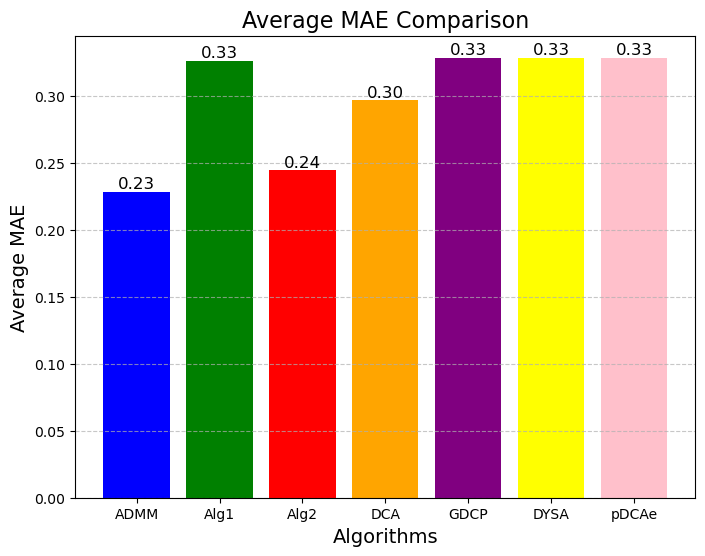

In [270]:
import matplotlib.pyplot as plt

 
mae_values = [average_GD_mae, average_Alg1_mae, average_Alg2_mae, average_DCA_mae, average_GDCP_mae, average_DYSA_mae, average_pDCAe_mae]   
algorithms = ['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP', 'DYSA', 'pDCAe']

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, mae_values, color=['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink'])

# Add scores on top of each bar
for bar, score in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Average MAE Comparison', fontsize=16)
plt.ylabel('Average MAE', fontsize=14)
plt.xlabel('Algorithms', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display
plt.savefig('mae_dataset2.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


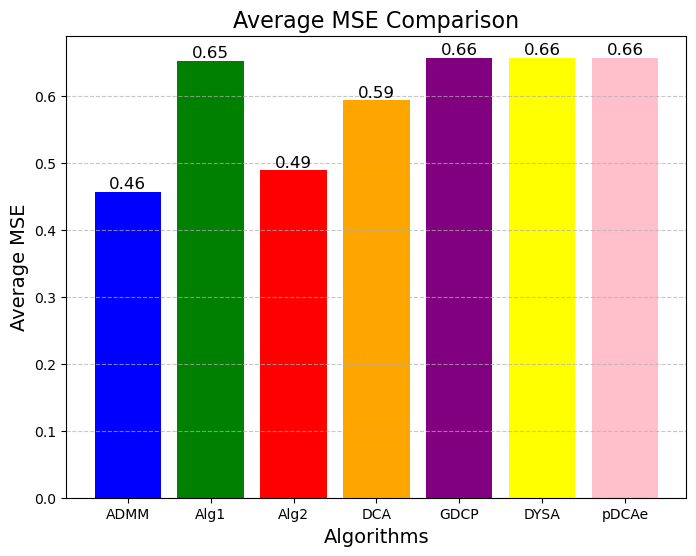

In [276]:
mse_values = [average_GD_mse, average_Alg1_mse, average_Alg2_mse, average_DCA_mse, average_GDCP_mse, average_DYSA_mse, average_pDCAe_mse]   
algorithms = ['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP', 'DYSA', 'pDCAe']

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, mse_values, color=['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink'])

# Add scores on top of each bar
for bar, score in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Average MSE Comparison', fontsize=16)
plt.ylabel('Average MSE', fontsize=14)
plt.xlabel('Algorithms', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display
plt.savefig('mse_dataset2.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


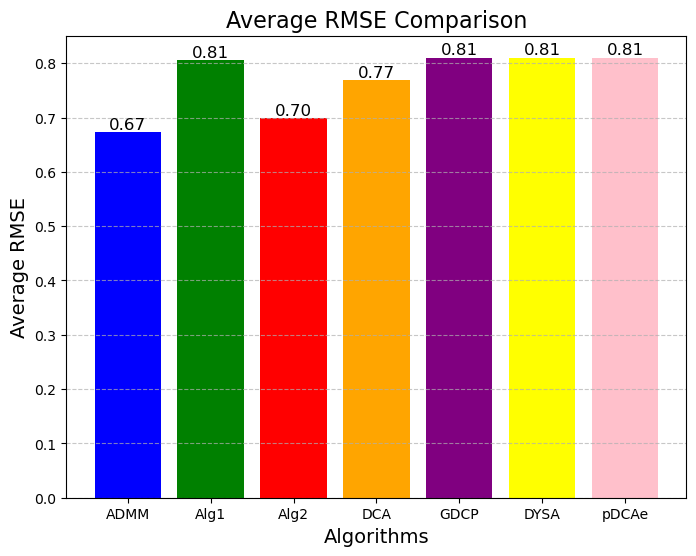

In [278]:
rmse_values = [average_GD_rmse, average_Alg1_rmse, average_Alg2_rmse, average_DCA_rmse, average_GDCP_rmse, average_DYSA_rmse, average_pDCAe_rmse]   
algorithms = ['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP', 'DYSA', 'pDCAe']

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, rmse_values, color=['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink'])

# Add scores on top of each bar
for bar, score in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Average RMSE Comparison', fontsize=16)
plt.ylabel('Average RMSE', fontsize=14)
plt.xlabel('Algorithms', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display
plt.savefig('rmse_dataset2.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


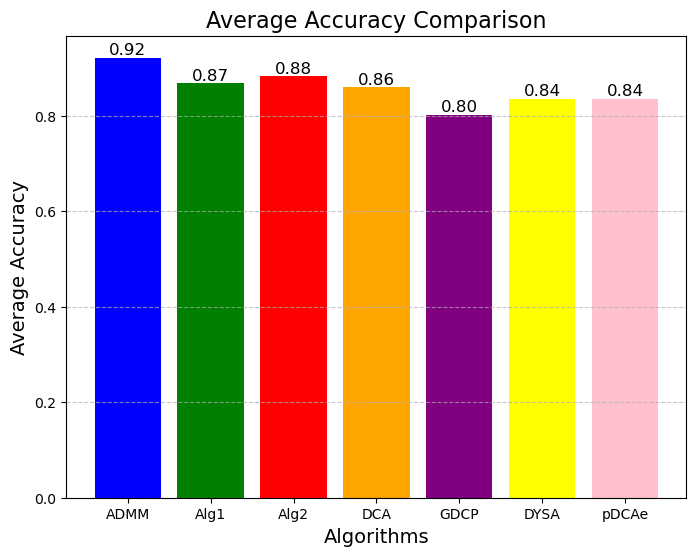

In [284]:
import matplotlib.pyplot as plt

# Data
accuracy = [0.9212, 0.8681, 0.8829, 0.8595, 0.8018, 0.8357, 0.8357]
algorithms = ['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP', 'DYSA', 'pDCAe']

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, accuracy, color=['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink'])

# Add scores on top of each bar
for bar, score in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Average Accuracy Comparison', fontsize=16)
plt.ylabel('Average Accuracy', fontsize=14)
plt.xlabel('Algorithms', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display
plt.savefig('accuracy_dataset2.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


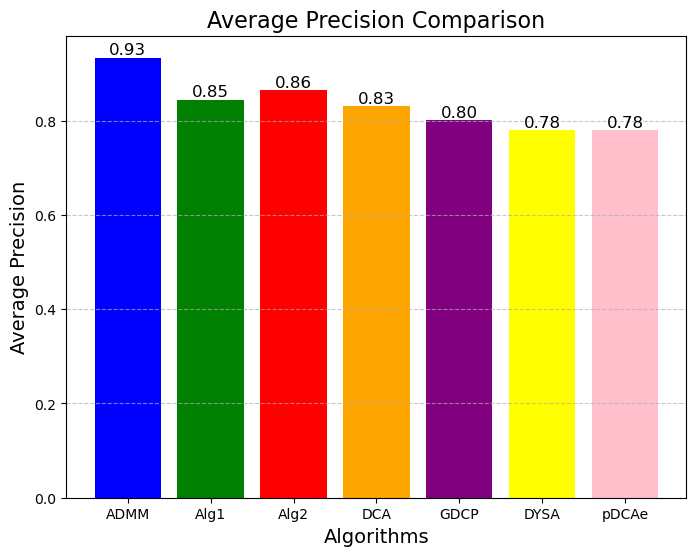

In [282]:
# Data
precision = [0.9339, 0.8451, 0.8644, 0.8307, 0.8009, 0.7797, 0.7797]
algorithms = ['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP', 'DYSA', 'pDCAe']

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, precision, color=['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink'])

# Add scores on top of each bar
for bar, score in zip(bars, precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Average Precision Comparison', fontsize=16)
plt.ylabel('Average Precision', fontsize=14)
plt.xlabel('Algorithms', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display
plt.savefig('precision_dataset2.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


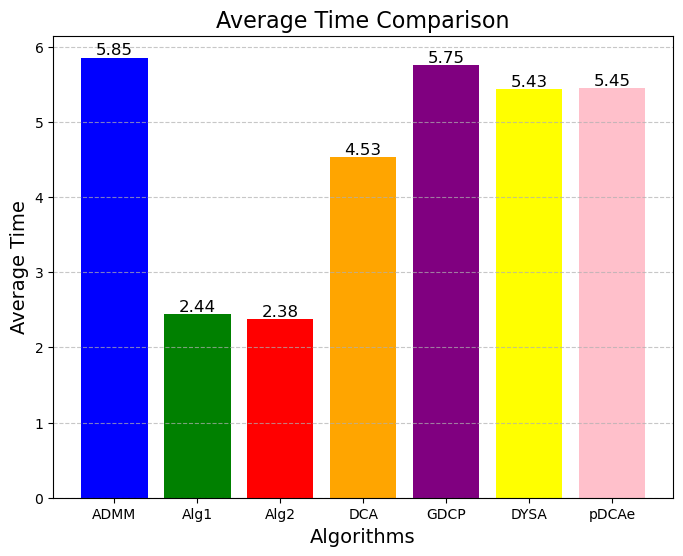

In [280]:
# Data
time = [5.8518, 2.4441, 2.3769, 4.5320, 5.7514, 5.4310, 5.4458]
algorithms = ['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP', 'DYSA', 'pDCAe']

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, time, color=['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink'])

# Add scores on top of each bar
for bar, score in zip(bars, time):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Average Time Comparison', fontsize=16)
plt.ylabel('Average Time', fontsize=14)
plt.xlabel('Algorithms', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display
plt.savefig('time_dataset2.eps', format='eps')
plt.show()


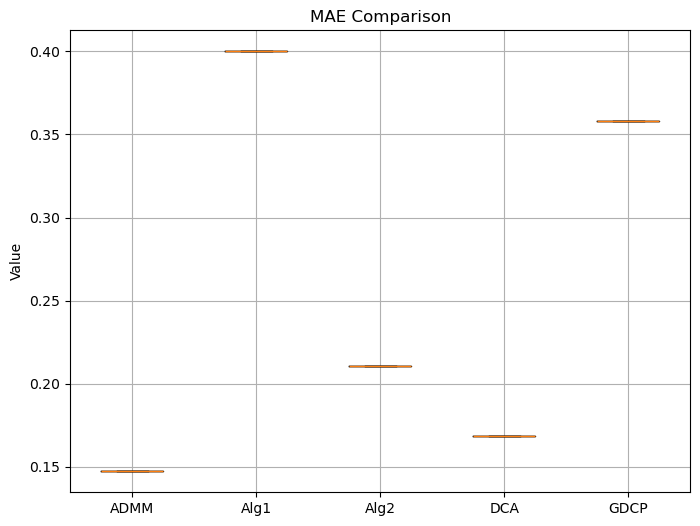

In [173]:
import matplotlib.pyplot as plt

# Assuming you have calculated MAE, MSE, and RMSE values
# Example usage
mae_values_GD = [mae_GD]
mae_values_Alg1 = [mae_Alg1]
mae_values_Alg2 = [mae_Alg2]
mae_values_DCA = [mae_DCA]
mae_values_GDCP = [mae_GDCP]
#mse_values = [mse]
#rmse_values = [rmse]

# Create a box plot
plt.figure(figsize=(8, 6))
#plt.boxplot([mae_values_GD, mse_values, rmse_values], labels=['MAE', 'MSE', 'RMSE'])
plt.boxplot([mae_values_GD, mae_values_Alg1, mae_values_Alg2, mae_values_DCA, mae_values_GDCP], labels=['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP'])
plt.title('MAE Comparison')
plt.ylabel('Value')
plt.grid(True)
plt.savefig('dataset2_30n_mae.eps', format='eps')
plt.show()

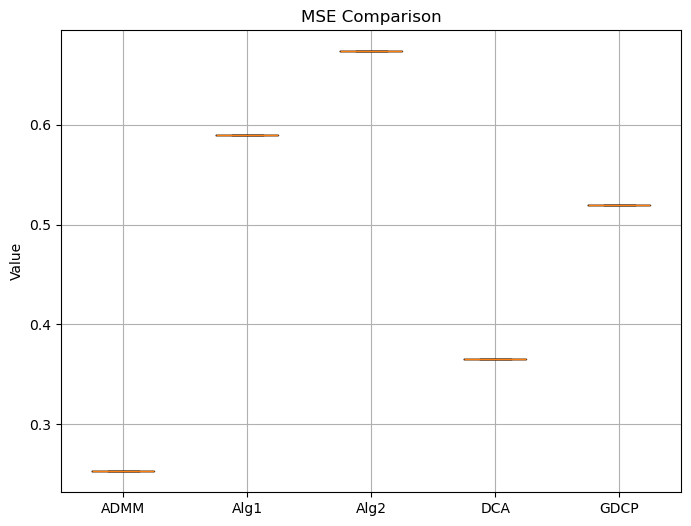

In [103]:
mse_values_GD = [mse_GD]
mse_values_Alg1 = [mse_Alg1]
mse_values_Alg2 = [mse_Alg2]
mse_values_DCA = [mse_DCA]
mse_values_GDCP = [mse_GDCP]
#mse_values = [mse]
#rmse_values = [rmse]

# Create a box plot
plt.figure(figsize=(8, 6))
#plt.boxplot([mae_values_GD, mse_values, rmse_values], labels=['MAE', 'MSE', 'RMSE'])
plt.boxplot([mse_values_GD, mse_values_Alg1, mse_values_Alg2, mse_values_DCA, mse_values_GDCP], labels=['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP'])
plt.title('MSE Comparison')
plt.ylabel('Value')
plt.grid(True)
plt.savefig('dataset2_30n_mse.eps', format='eps')
plt.show()

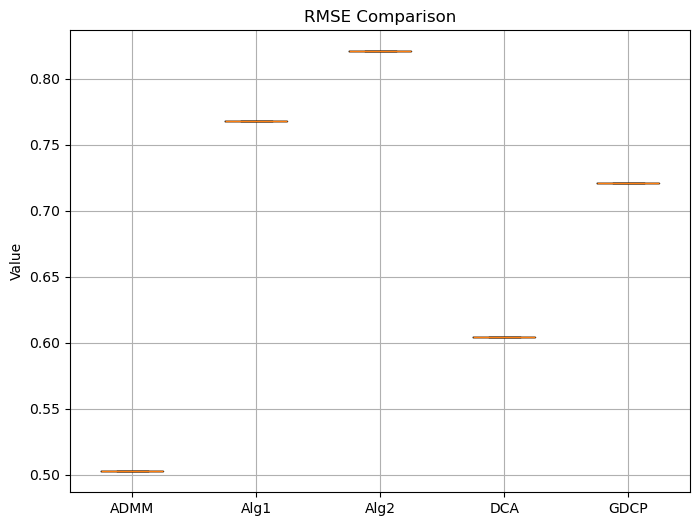

In [105]:
rmse_values_GD = [rmse_GD]
rmse_values_Alg1 = [rmse_Alg1]
rmse_values_Alg2 = [rmse_Alg2]
rmse_values_DCA = [rmse_DCA]
rmse_values_GDCP = [rmse_GDCP]
#mse_values = [mse]
#rmse_values = [rmse]

# Create a box plot
plt.figure(figsize=(8, 6))
#plt.boxplot([mae_values_GD, mse_values, rmse_values], labels=['MAE', 'MSE', 'RMSE'])
plt.boxplot([rmse_values_GD, rmse_values_Alg1, rmse_values_Alg2, rmse_values_DCA, rmse_values_GDCP], labels=['ADMM', 'Alg1', 'Alg2', 'DCA', 'GDCP'])
plt.title('RMSE Comparison')
plt.ylabel('Value')
plt.grid(True)
plt.savefig('dataset2_30n_rmse.eps', format='eps')
plt.show()

In [107]:
def calculate_scores(y_true, y_pred):
    # Calculate TP, FP, FN
    TP = sum((y_true == 1) & (y_pred == 1))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))

    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Calculate recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

In [109]:
precision_GD, recall_GD, f1_score_GD = calculate_scores(y_test, y_pred_GD)

print("Precision for GD:", precision_GD)
print("recall for GD:", recall_GD)
print("f1_score for GD:", f1_score_GD)

Precision for GD: 1.0
recall for GD: 1.0
f1_score for GD: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import KFold

# Define your parameters
alpha = 0.01  # learning rate
lam = 0.1  # regularization parameter for L1 penalty
lr = 0.01  # learning rate
max_iter = 1000
tol = 1e-5
cv_folds = 5  # number of folds for cross-validation

# Define the cross-validation splitter object
kf = KFold(n_splits=cv_folds, shuffle=True)

# Define your algorithm
def svm_cv_score(alpha, lam, lr, max_iter, tol, X, y, cv):
    scores = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Run the algorithm on the training data
        w_final, b_final, _ = dc_programming_GD(X_train, y_train, alpha, lam, lr, max_iter, tol)
        
        # Calculate accuracy on the test data
        accuracy = np.mean(np.sign(np.dot(X_test, w_final) + b_final) == y_test)
        scores.append(accuracy)
    return scores

# Calculate cross-validation score
cv_scores = svm_cv_score(alpha, lam, lr, max_iter, tol, X, y, kf)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

In [ ]:
# Assuming X contains your features and y contains your labels
# alpha: learning rate, lam: regularization parameter for L1 penalty
# lr: learning rate, max_iter: maximum iterations, tol: convergence tolerance
# cv: number of folds for cross-validation

# Define your algorithm
def svm_cv_score(w_final, b_final, lr, max_iter, tol,cv):
    scores = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Run the algorithm on the training data
        #w_final, b_final, _ = dc_programming_l1svm(X_train, y_train, alpha, lam, lr, max_iter, tol)
        
        # Calculate accuracy on the test data
        accuracy = np.mean(np.sign(np.dot(X_test, w_final) + b_final) == y_test)
        scores.append(accuracy)
    return scores


In [ ]:
# Define your parameters
alpha = 0.01  # learning rate
lam = 0.1  # regularization parameter for L1 penalty
lr = 0.01  # learning rate
max_iter = 2000
tol = 1e-5
cv = 5  # number of folds for cross-validation

# Calculate cross-validation score
cv_scores = svm_cv_score(w_final_GD, b_final_GD, lr, max_iter, tol, cv)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))